In [2]:
#Import Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold,train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import StratifiedKFold,KFold,GridSearchCV
from sklearn.feature_selection import RFECV,RFE,f_regression,mutual_info_regression,VarianceThreshold,SelectFromModel,mutual_info_regression
from sklearn.feature_extraction.image import grid_to_graph
from sklearn import feature_selection
from sklearn.cluster import FeatureAgglomeration
from sklearn.linear_model import BayesianRidge

import eli5
from eli5.sklearn import PermutationImportance

import shutil
import tempfile
from scipy import linalg, ndimage
from joblib import Memory as mem

In [56]:

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

df = pd.read_csv('2ex1.csv',header=0)
df1 = pd.read_csv('1ex1.csv',header=0)

#All features
#X = df[['DS_DST1','DS_DST2','DS_DST3','DS_DST4','DS_DST5','DS_DST6','DS_DST7','DS_DST8','DS_DSD1','DS_DSD2','DS_DSD3','DS_DSD4','DS_DSDT','massSensorBucketTeeth Mass','SoilTransferSensor2 MassTot','Collisionsensor_Ground isColliding','Collisionsensor_Ground nminor','Collisionsensor_Ground nserious','Collisionsensor_Ground ncritical','DS_MotorRPM','DS_Fuel_Meter','DS_Slew_Force','DS_Bkt_Force','DS_Dipper_Force','DS_BoomR_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_CylinderDipperLift','DS_CylinderBucketLift','DS_Slew','DS_Bucket_Angle','DS_Dipper_Angle','DS_Boom_Angle','DS_Slew_Angle','DS_BoomCylinderPressureA','DS_BoomCylinderPressureB','DS_DipperCylinderPressureA','DS_DipperCylinderPressureB','DS_BucketCylinderPressureA','DS_BucketCylinderPressureB','DS_Boom_zdd','DS_Boom_ydd','DS_Boom_xdd','DS_Dipper_zdd','DS_Dipper_ydd','DS_Dipper_xdd','DS_Bkt_zdd','DS_Bkt_ydd','DS_Bkt_xdd','DS_Bktwx','DS_Bktwy','DS_Bktwz','DS_Dipperwx','DS_Dipperwy','DS_Dipperwz','DS_Boomwx','DS_Boomwy','DS_Boomwz','DS_Upperwx','DS_Upperwy','DS_Upperwz']]
#y = df[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]

#Removed correlated
X = df[['DS_DST1','DS_DST2','DS_DST3','DS_DST4','DS_DST5','DS_DST6','DS_DST7','DS_DST8','DS_DSD1','DS_DSD2','DS_DSD4','SoilTransferSensor2 MassTot','DS_Fuel_Meter','DS_Slew_Force','DS_Bkt_Force','DS_Dipper_Force','DS_BoomR_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_CylinderDipperLift','DS_CylinderBucketLift','DS_Slew','DS_Bucket_Angle','DS_Dipper_Angle','DS_Boom_Angle','DS_Slew_Angle','DS_BoomCylinderPressureA','DS_BoomCylinderPressureB','DS_DipperCylinderPressureA','DS_DipperCylinderPressureB','DS_BucketCylinderPressureA','DS_BucketCylinderPressureB','DS_Boom_ydd','DS_Boom_xdd','DS_Dipper_ydd','DS_Dipper_xdd','DS_Bkt_zdd','DS_Bkt_ydd','DS_Bkt_xdd','DS_Bktwx','DS_Bktwy','DS_Bktwz','DS_Dipperwx','DS_Dipperwy','DS_Dipperwz','DS_Boomwx','DS_Boomwy','DS_Boomwz','DS_Upperwx','DS_Upperwy','DS_Upperwz']]
y = df[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X)
X = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y)
y = pd.DataFrame(scaler_y)

X_train,X_test,y_train,y_test = train_test_split(X,y)

y_train0 = y_train.iloc[:,0]


C:\Users\wsjr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [57]:
#sklnn = MLPRegressor(hidden_layer_sizes=(50,100,50),activation='relu',solver='adam')
lr = LinearRegression()
lr.fit(X_train,y_train)
rfe = RFE(estimator=lr,n_features_to_select=5,step=1,verbose=2)
rfe.fit(X_train,y_train0)

#print("No.Features: %s" % (rfe.n_features))
print("Selected Features: %s" % (rfe.support_))
print("Feature Ranking: %s" % (rfe.ranking_))

Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 fe

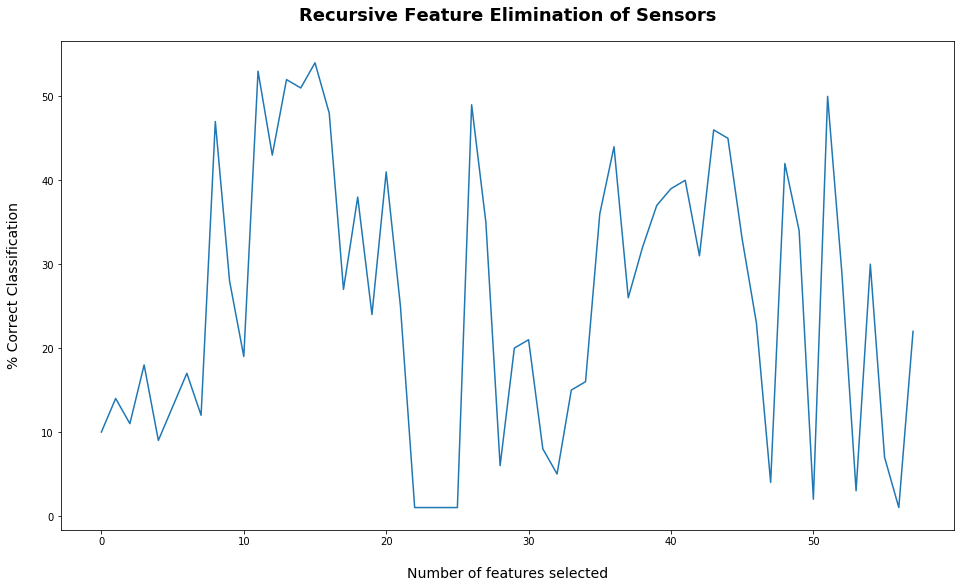

In [77]:
# https://towardsdatascience.com/feature-selection-in-python-recursive-feature-elimination-19f1c39b8d15
# https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_digits.html#sphx-glr-auto-examples-feature-selection-plot-rfe-digits-py
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination of Sensors', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(rfe.ranking_)


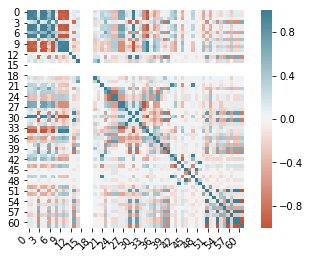

In [73]:
import seaborn as sns

corr = X_train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


In [68]:
c = X_train.corr().abs()

s = c.unstack()
so = s.sort_values(ascending = False)
print(so.to_string())

58  58    1.000000
35  35    1.000000
53  53    1.000000
52  52    1.000000
51  51    1.000000
50  50    1.000000
46  46    1.000000
45  45    1.000000
44  44    1.000000
43  43    1.000000
42  42    1.000000
41  41    1.000000
40  40    1.000000
39  39    1.000000
38  38    1.000000
37  37    1.000000
29  29    1.000000
56  56    1.000000
28  28    1.000000
26  26    1.000000
24  24    1.000000
23  23    1.000000
22  22    1.000000
21  21    1.000000
20  20    1.000000
19  19    1.000000
14  14    1.000000
13  13    1.000000
10  10    1.000000
8   8     1.000000
6   6     1.000000
3   3     1.000000
55  55    1.000000
36  36    1.000000
0   0     1.000000
    10    0.942693
10  0     0.942693
44  42    0.923419
42  44    0.923419
29  13    0.921859
13  29    0.921859
21  41    0.916142
41  21    0.916142
24  23    0.870845
23  24    0.870845
13  3     0.842756
3   13    0.842756
    6     0.833202
6   3     0.833202
3   29    0.823627
29  3     0.823627
    40    0.815668
40  29    0.

In [71]:
print(X_train)

            0         1         2         3         4         5         6   \
2827  0.014030  0.060662  0.217156  0.681725  0.048497  0.051352  0.482322   
2071  0.246394  0.221439  0.229421  0.111824  0.283439  0.249271  0.274830   
2198  0.859754  0.824204  0.785126  0.438001  0.855879  0.811539  0.529060   
1597  0.344238  0.213272  0.401749  0.217748  0.381604  0.269472  0.384499   
331   0.095261  0.202033  0.064449  0.257629  0.106265  0.152355  0.191219   
1409  0.090046  0.066117  0.258177  0.573427  0.135765  0.099527  0.479782   
2101  0.481853  0.357630  0.468874  0.007474  0.503834  0.386672  0.283329   
318   0.093830  0.197323  0.063964  0.249076  0.098704  0.138401  0.166450   
842   0.217274  0.182396  0.400864  0.787037  0.297436  0.287287  0.771707   
2551  0.475035  0.384062  0.450723  0.077285  0.507239  0.427118  0.361552   
2280  0.529877  0.356296  0.625928  0.450035  0.563312  0.419170  0.583494   
2097  0.467562  0.344045  0.455663  0.003732  0.490366  0.374057

In [88]:
X_10 = df[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz']]
y_10 = df[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X10=MinMaxScaler()
scaler_X10 = scaler_X10.fit_transform(X_10)
X_10 = pd.DataFrame(scaler_X10)
scaler_y10=MinMaxScaler()
scaler_y10 = scaler_y10.fit_transform(y_10)
y_10 = pd.DataFrame(scaler_y10)

X_pred10 = df1[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz']]
y_actual10 = df1[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X_pred10)
X_pred10 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y_actual10)
y_actual10 = pd.DataFrame(scaler_y)


X_train,X_test,y_train,y_test = train_test_split(X_10,y_10)



In [90]:
#RFE Neural Network decorrelated with 10 features

neurons = [5,10,25,50,75,100,150,200]
decorrdata10 = []
#drop = [0.2,0.3,0.4,0.5]
for x in neurons:
    for i in neurons:

        #Create the main Neural Network
        model = Sequential()
        model.add(Dense(x, activation = 'relu',input_shape=(14,)))
        model.add(Dense(i,activation='relu'))
        model.add(Dense(4,activation='sigmoid'))#Changed to sigmoid to allow 0 to 1

        model.compile(loss='mse',optimizer='adam')

        model.fit(X_train,y_train,batch_size=50,epochs=200,verbose=2,validation_data=(X_test,y_test),shuffle=False) #Changed shuffle to true

        y_pred = model.predict(X_pred)
        bear = mse(y_actual,y_pred)

        result = str(bear)+" ,layer 1 "+str(x) + " ,layer 2 "+str(i)
        decorrdata10.append(pd.Series(result))

Train on 2139 samples, validate on 713 samples
Epoch 1/200
 - 0s - loss: 0.1050 - val_loss: 0.0932
Epoch 2/200
 - 0s - loss: 0.0924 - val_loss: 0.0873
Epoch 3/200
 - 0s - loss: 0.0870 - val_loss: 0.0833
Epoch 4/200
 - 0s - loss: 0.0843 - val_loss: 0.0820
Epoch 5/200
 - 0s - loss: 0.0836 - val_loss: 0.0817
Epoch 6/200
 - 0s - loss: 0.0832 - val_loss: 0.0815
Epoch 7/200
 - 0s - loss: 0.0829 - val_loss: 0.0813
Epoch 8/200
 - 0s - loss: 0.0827 - val_loss: 0.0812
Epoch 9/200
 - 0s - loss: 0.0825 - val_loss: 0.0811
Epoch 10/200
 - 0s - loss: 0.0824 - val_loss: 0.0811
Epoch 11/200
 - 0s - loss: 0.0823 - val_loss: 0.0811
Epoch 12/200
 - 0s - loss: 0.0822 - val_loss: 0.0810
Epoch 13/200
 - 0s - loss: 0.0822 - val_loss: 0.0810
Epoch 14/200
 - 0s - loss: 0.0822 - val_loss: 0.0810
Epoch 15/200
 - 0s - loss: 0.0821 - val_loss: 0.0811
Epoch 16/200
 - 0s - loss: 0.0821 - val_loss: 0.0811
Epoch 17/200
 - 0s - loss: 0.0821 - val_loss: 0.0811
Epoch 18/200
 - 0s - loss: 0.0821 - val_loss: 0.0811
Epoch 19

Epoch 154/200
 - 0s - loss: 0.0403 - val_loss: 0.0431
Epoch 155/200
 - 0s - loss: 0.0402 - val_loss: 0.0431
Epoch 156/200
 - 0s - loss: 0.0402 - val_loss: 0.0431
Epoch 157/200
 - 0s - loss: 0.0402 - val_loss: 0.0430
Epoch 158/200
 - 0s - loss: 0.0401 - val_loss: 0.0430
Epoch 159/200
 - 0s - loss: 0.0401 - val_loss: 0.0430
Epoch 160/200
 - 0s - loss: 0.0401 - val_loss: 0.0430
Epoch 161/200
 - 0s - loss: 0.0401 - val_loss: 0.0430
Epoch 162/200
 - 0s - loss: 0.0400 - val_loss: 0.0429
Epoch 163/200
 - 0s - loss: 0.0400 - val_loss: 0.0429
Epoch 164/200
 - 0s - loss: 0.0400 - val_loss: 0.0429
Epoch 165/200
 - 0s - loss: 0.0400 - val_loss: 0.0429
Epoch 166/200
 - 0s - loss: 0.0399 - val_loss: 0.0429
Epoch 167/200
 - 0s - loss: 0.0399 - val_loss: 0.0429
Epoch 168/200
 - 0s - loss: 0.0399 - val_loss: 0.0428
Epoch 169/200
 - 0s - loss: 0.0399 - val_loss: 0.0428
Epoch 170/200
 - 0s - loss: 0.0398 - val_loss: 0.0428
Epoch 171/200
 - 0s - loss: 0.0398 - val_loss: 0.0428
Epoch 172/200
 - 0s - loss: 

ValueError: Error when checking input: expected dense_10_input to have shape (14,) but got array with shape (62,)

In [82]:
#from google.colab import files
#uploaded = files.upload()
df = pd.read_csv('2ex1.csv',header=0)
df.head()
df1 = pd.read_csv('1ex1.csv',header=0)
df2= pd.read_csv('2ex2.csv',header=0)
df3= pd.read_csv('2ex3.csv',header=0)
df4= pd.read_csv('2ex4.csv',header=0)
df5= pd.read_csv('2ex5.csv',header=0)
df6= pd.read_csv('2ex6.csv',header=0)
df7= pd.read_csv('2ex7.csv',header=0)
df8= pd.read_csv('2ex8.csv',header=0)
df9= pd.read_csv('2ex9.csv',header=0)
df10= pd.read_csv('2ex10.csv',header=0)
df11= pd.read_csv('2ex11.csv',header=0)
df12= pd.read_csv('2ex12.csv',header=0)
df13= pd.read_csv('2ex13.csv',header=0)
df14= pd.read_csv('2ex14.csv',header=0)
df15= pd.read_csv('2ex15.csv',header=0)

X_10 = df[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz']]
y_10 = df[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X10=MinMaxScaler()
scaler_X10 = scaler_X10.fit_transform(X_10)
X_10 = pd.DataFrame(scaler_X10)
scaler_y10=MinMaxScaler()
scaler_y10 = scaler_y10.fit_transform(y_10)
y_10 = pd.DataFrame(scaler_y10)

X_pred10 = df1[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz']]
y_actual10 = df1[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X_pred10)
X_pred10 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y_actual10)
y_actual10 = pd.DataFrame(scaler_y)

X2 = df2[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz']]
y2 = df2[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X2)
X2 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y2)
y2 = pd.DataFrame(scaler_y)

X3 = df3[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz']]
y3 = df3[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X3)
X3 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y3)
y3 = pd.DataFrame(scaler_y)

X4 = df4[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz']]
y4 = df4[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X4)
X4 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y4)
y4 = pd.DataFrame(scaler_y)

X5 = df5[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz']]
y5 = df5[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X5)
X5 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y5)
y5 = pd.DataFrame(scaler_y)

X6 = df6[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz']]
y6 = df6[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X6)
X6 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y6)
y6 = pd.DataFrame(scaler_y)

X7 = df7[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz']]
y7 = df7[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X7)
X7 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y7)
y7 = pd.DataFrame(scaler_y)

X8 = df8[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz']]
y8 = df8[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X8)
X8 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y8)
y8 = pd.DataFrame(scaler_y)

X9 = df9[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz']]
y9 = df9[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X9)
X9 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y9)
y9 = pd.DataFrame(scaler_y)

X10 = df10[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz']]
y10 = df10[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X10)
X10 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y10)
y10 = pd.DataFrame(scaler_y)

X11 = df11[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz']]
y11 = df11[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X11)
X11 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y11)
y11 = pd.DataFrame(scaler_y)

X12 = df12[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz']]
y12 = df12[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X12)
X12 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y12)
y12 = pd.DataFrame(scaler_y)

X13 = df13[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz']]
y13 = df13[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X13)
X13 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y13)
y13 = pd.DataFrame(scaler_y)

X14 = df14[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz']]
y14 = df14[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X14)
X14 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y14)
y14 = pd.DataFrame(scaler_y)

X15 = df15[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz']]
y15 = df15[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X15)
X15 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y15)
y15 = pd.DataFrame(scaler_y)

#X_pred = df1.drop(df1.ix[:,69:],axis=1)
#X_pred = X_pred.drop(X_pred.ix[:,52:57],axis=1)
#X_pred = X_pred.drop(X_pred.ix[:,25:40],axis=1)
#X_pred = X_pred.drop(X_pred.ix[:,17])
#y_actual = df1.iloc[:,25:29]

X_train,X_test,y_train,y_test = train_test_split(X_10,y_10)
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2)
X_train3,X_test3,y_train3,y_test3 = train_test_split(X3,y3)
X_train4,X_test4,y_train4,y_test4 = train_test_split(X4,y4)
X_train5,X_test5,y_train5,y_test5 = train_test_split(X5,y5)
X_train6,X_test6,y_train6,y_test6 = train_test_split(X6,y6)
X_train7,X_test7,y_train7,y_test7 = train_test_split(X7,y7)
X_train8,X_test8,y_train8,y_test8 = train_test_split(X8,y8)
X_train9,X_test9,y_train9,y_test9 = train_test_split(X9,y9)
X_train10,X_test10,y_train10,y_test10 = train_test_split(X10,y10)
X_train11,X_test11,y_train11,y_test11 = train_test_split(X11,y11)
X_train12,X_test12,y_train12,y_test12 = train_test_split(X12,y12)
X_train13,X_test13,y_train13,y_test13 = train_test_split(X13,y13)
X_train14,X_test14,y_train14,y_test14 = train_test_split(X14,y14)
X_train15,X_test15,y_train15,y_test15 = train_test_split(X15,y15)

#L1FO Neural Network decorrelated with 10 features


#Create the main Neural Network
model = Sequential()
model.add(Dense(200, activation = 'relu',input_shape=(10,)))
model.add(Dense(10,activation='relu'))
model.add(Dense(4,activation='sigmoid'))#Changed to sigmoid to allow 0 to 1

model.compile(loss='mse',optimizer='adam')

model.fit(X_train,y_train,batch_size=50,epochs=200,verbose=2,validation_data=(X_test,y_test),shuffle=False) #Changed shuffle to true
model.fit(X_train2,y_train2,batch_size=50,epochs=200,verbose=2,validation_data=(X_test2,y_test2),shuffle=False) #Changed shuffle to true
model.fit(X_train3,y_train3,batch_size=50,epochs=200,verbose=2,validation_data=(X_test3,y_test3),shuffle=False) #Changed shuffle to true
model.fit(X_train4,y_train4,batch_size=50,epochs=200,verbose=2,validation_data=(X_test4,y_test4),shuffle=False) #Changed shuffle to true
model.fit(X_train5,y_train5,batch_size=50,epochs=200,verbose=2,validation_data=(X_test5,y_test5),shuffle=False) #Changed shuffle to true
model.fit(X_train6,y_train6,batch_size=50,epochs=200,verbose=2,validation_data=(X_test6,y_test6),shuffle=False) #Changed shuffle to true
model.fit(X_train7,y_train7,batch_size=50,epochs=200,verbose=2,validation_data=(X_test7,y_test7),shuffle=False) #Changed shuffle to true
model.fit(X_train8,y_train8,batch_size=50,epochs=200,verbose=2,validation_data=(X_test8,y_test8),shuffle=False) #Changed shuffle to true
model.fit(X_train9,y_train9,batch_size=50,epochs=200,verbose=2,validation_data=(X_test9,y_test9),shuffle=False) #Changed shuffle to true
model.fit(X_train10,y_train10,batch_size=50,epochs=200,verbose=2,validation_data=(X_test10,y_test10),shuffle=False) #Changed shuffle to true
model.fit(X_train11,y_train11,batch_size=50,epochs=200,verbose=2,validation_data=(X_test11,y_test11),shuffle=False) #Changed shuffle to true
model.fit(X_train12,y_train12,batch_size=50,epochs=200,verbose=2,validation_data=(X_test12,y_test12),shuffle=False) #Changed shuffle to true
model.fit(X_train13,y_train13,batch_size=50,epochs=200,verbose=2,validation_data=(X_test13,y_test13),shuffle=False) #Changed shuffle to true
model.fit(X_train14,y_train14,batch_size=50,epochs=200,verbose=2,validation_data=(X_test14,y_test14),shuffle=False) #Changed shuffle to true
model.fit(X_train15,y_train15,batch_size=50,epochs=200,verbose=2,validation_data=(X_test15,y_test15),shuffle=False) #Changed shuffle to true 

y_pred = model.predict(X_pred10)
result10 = mse(y_actual10,y_pred)


Train on 2139 samples, validate on 713 samples
Epoch 1/200
 - 2s - loss: 0.0797 - val_loss: 0.0762
Epoch 2/200
 - 0s - loss: 0.0744 - val_loss: 0.0730
Epoch 3/200
 - 0s - loss: 0.0720 - val_loss: 0.0713
Epoch 4/200
 - 0s - loss: 0.0704 - val_loss: 0.0696
Epoch 5/200
 - 0s - loss: 0.0686 - val_loss: 0.0675
Epoch 6/200
 - 0s - loss: 0.0665 - val_loss: 0.0650
Epoch 7/200
 - 0s - loss: 0.0641 - val_loss: 0.0623
Epoch 8/200
 - 0s - loss: 0.0617 - val_loss: 0.0597
Epoch 9/200
 - 0s - loss: 0.0593 - val_loss: 0.0573
Epoch 10/200
 - 0s - loss: 0.0572 - val_loss: 0.0553
Epoch 11/200
 - 0s - loss: 0.0553 - val_loss: 0.0536
Epoch 12/200
 - 0s - loss: 0.0535 - val_loss: 0.0520
Epoch 13/200
 - 0s - loss: 0.0518 - val_loss: 0.0505
Epoch 14/200
 - 0s - loss: 0.0503 - val_loss: 0.0492
Epoch 15/200
 - 0s - loss: 0.0488 - val_loss: 0.0479
Epoch 16/200
 - 0s - loss: 0.0475 - val_loss: 0.0469
Epoch 17/200
 - 0s - loss: 0.0462 - val_loss: 0.0459
Epoch 18/200
 - 0s - loss: 0.0451 - val_loss: 0.0450
Epoch 19

Epoch 154/200
 - 0s - loss: 0.0158 - val_loss: 0.0162
Epoch 155/200
 - 0s - loss: 0.0158 - val_loss: 0.0162
Epoch 156/200
 - 0s - loss: 0.0158 - val_loss: 0.0161
Epoch 157/200
 - 0s - loss: 0.0157 - val_loss: 0.0161
Epoch 158/200
 - 0s - loss: 0.0157 - val_loss: 0.0161
Epoch 159/200
 - 0s - loss: 0.0156 - val_loss: 0.0160
Epoch 160/200
 - 0s - loss: 0.0156 - val_loss: 0.0160
Epoch 161/200
 - 0s - loss: 0.0156 - val_loss: 0.0159
Epoch 162/200
 - 0s - loss: 0.0155 - val_loss: 0.0159
Epoch 163/200
 - 0s - loss: 0.0155 - val_loss: 0.0159
Epoch 164/200
 - 0s - loss: 0.0155 - val_loss: 0.0159
Epoch 165/200
 - 0s - loss: 0.0154 - val_loss: 0.0158
Epoch 166/200
 - 0s - loss: 0.0154 - val_loss: 0.0158
Epoch 167/200
 - 0s - loss: 0.0154 - val_loss: 0.0158
Epoch 168/200
 - 0s - loss: 0.0154 - val_loss: 0.0158
Epoch 169/200
 - 0s - loss: 0.0153 - val_loss: 0.0157
Epoch 170/200
 - 0s - loss: 0.0153 - val_loss: 0.0156
Epoch 171/200
 - 0s - loss: 0.0152 - val_loss: 0.0156
Epoch 172/200
 - 0s - loss: 

Epoch 107/200
 - 0s - loss: 0.0229 - val_loss: 0.0244
Epoch 108/200
 - 0s - loss: 0.0228 - val_loss: 0.0244
Epoch 109/200
 - 0s - loss: 0.0228 - val_loss: 0.0243
Epoch 110/200
 - 0s - loss: 0.0227 - val_loss: 0.0243
Epoch 111/200
 - 0s - loss: 0.0227 - val_loss: 0.0242
Epoch 112/200
 - 0s - loss: 0.0226 - val_loss: 0.0241
Epoch 113/200
 - 0s - loss: 0.0225 - val_loss: 0.0240
Epoch 114/200
 - 0s - loss: 0.0225 - val_loss: 0.0240
Epoch 115/200
 - 0s - loss: 0.0224 - val_loss: 0.0239
Epoch 116/200
 - 0s - loss: 0.0223 - val_loss: 0.0239
Epoch 117/200
 - 0s - loss: 0.0223 - val_loss: 0.0238
Epoch 118/200
 - 0s - loss: 0.0222 - val_loss: 0.0238
Epoch 119/200
 - 0s - loss: 0.0222 - val_loss: 0.0237
Epoch 120/200
 - 0s - loss: 0.0221 - val_loss: 0.0236
Epoch 121/200
 - 0s - loss: 0.0220 - val_loss: 0.0236
Epoch 122/200
 - 0s - loss: 0.0220 - val_loss: 0.0235
Epoch 123/200
 - 0s - loss: 0.0219 - val_loss: 0.0234
Epoch 124/200
 - 0s - loss: 0.0219 - val_loss: 0.0234
Epoch 125/200
 - 0s - loss: 

 - 0s - loss: 0.0148 - val_loss: 0.0153
Epoch 60/200
 - 0s - loss: 0.0148 - val_loss: 0.0152
Epoch 61/200
 - 0s - loss: 0.0147 - val_loss: 0.0152
Epoch 62/200
 - 0s - loss: 0.0146 - val_loss: 0.0151
Epoch 63/200
 - 0s - loss: 0.0146 - val_loss: 0.0150
Epoch 64/200
 - 0s - loss: 0.0145 - val_loss: 0.0149
Epoch 65/200
 - 0s - loss: 0.0145 - val_loss: 0.0148
Epoch 66/200
 - 0s - loss: 0.0144 - val_loss: 0.0147
Epoch 67/200
 - 0s - loss: 0.0144 - val_loss: 0.0147
Epoch 68/200
 - 0s - loss: 0.0143 - val_loss: 0.0148
Epoch 69/200
 - 0s - loss: 0.0143 - val_loss: 0.0146
Epoch 70/200
 - 0s - loss: 0.0143 - val_loss: 0.0146
Epoch 71/200
 - 0s - loss: 0.0142 - val_loss: 0.0145
Epoch 72/200
 - 0s - loss: 0.0141 - val_loss: 0.0144
Epoch 73/200
 - 0s - loss: 0.0141 - val_loss: 0.0144
Epoch 74/200
 - 0s - loss: 0.0141 - val_loss: 0.0144
Epoch 75/200
 - 0s - loss: 0.0141 - val_loss: 0.0143
Epoch 76/200
 - 0s - loss: 0.0140 - val_loss: 0.0144
Epoch 77/200
 - 0s - loss: 0.0140 - val_loss: 0.0144
Epoch 

Epoch 12/200
 - 0s - loss: 0.0379 - val_loss: 0.0374
Epoch 13/200
 - 0s - loss: 0.0373 - val_loss: 0.0367
Epoch 14/200
 - 0s - loss: 0.0367 - val_loss: 0.0361
Epoch 15/200
 - 0s - loss: 0.0363 - val_loss: 0.0357
Epoch 16/200
 - 0s - loss: 0.0359 - val_loss: 0.0352
Epoch 17/200
 - 0s - loss: 0.0354 - val_loss: 0.0341
Epoch 18/200
 - 0s - loss: 0.0348 - val_loss: 0.0333
Epoch 19/200
 - 0s - loss: 0.0345 - val_loss: 0.0327
Epoch 20/200
 - 0s - loss: 0.0340 - val_loss: 0.0321
Epoch 21/200
 - 0s - loss: 0.0329 - val_loss: 0.0313
Epoch 22/200
 - 0s - loss: 0.0324 - val_loss: 0.0309
Epoch 23/200
 - 0s - loss: 0.0319 - val_loss: 0.0305
Epoch 24/200
 - 0s - loss: 0.0313 - val_loss: 0.0302
Epoch 25/200
 - 0s - loss: 0.0306 - val_loss: 0.0298
Epoch 26/200
 - 0s - loss: 0.0301 - val_loss: 0.0294
Epoch 27/200
 - 0s - loss: 0.0296 - val_loss: 0.0291
Epoch 28/200
 - 0s - loss: 0.0292 - val_loss: 0.0288
Epoch 29/200
 - 0s - loss: 0.0289 - val_loss: 0.0285
Epoch 30/200
 - 0s - loss: 0.0286 - val_loss: 

Epoch 166/200
 - 0s - loss: 0.0169 - val_loss: 0.0184
Epoch 167/200
 - 0s - loss: 0.0169 - val_loss: 0.0184
Epoch 168/200
 - 0s - loss: 0.0169 - val_loss: 0.0184
Epoch 169/200
 - 0s - loss: 0.0168 - val_loss: 0.0182
Epoch 170/200
 - 0s - loss: 0.0168 - val_loss: 0.0183
Epoch 171/200
 - 0s - loss: 0.0168 - val_loss: 0.0182
Epoch 172/200
 - 0s - loss: 0.0167 - val_loss: 0.0182
Epoch 173/200
 - 0s - loss: 0.0167 - val_loss: 0.0181
Epoch 174/200
 - 0s - loss: 0.0167 - val_loss: 0.0181
Epoch 175/200
 - 0s - loss: 0.0167 - val_loss: 0.0182
Epoch 176/200
 - 0s - loss: 0.0166 - val_loss: 0.0181
Epoch 177/200
 - 0s - loss: 0.0166 - val_loss: 0.0181
Epoch 178/200
 - 0s - loss: 0.0165 - val_loss: 0.0179
Epoch 179/200
 - 0s - loss: 0.0165 - val_loss: 0.0180
Epoch 180/200
 - 0s - loss: 0.0165 - val_loss: 0.0180
Epoch 181/200
 - 0s - loss: 0.0164 - val_loss: 0.0179
Epoch 182/200
 - 0s - loss: 0.0164 - val_loss: 0.0179
Epoch 183/200
 - 0s - loss: 0.0164 - val_loss: 0.0178
Epoch 184/200
 - 0s - loss: 

Epoch 119/200
 - 0s - loss: 0.0147 - val_loss: 0.0150
Epoch 120/200
 - 0s - loss: 0.0147 - val_loss: 0.0149
Epoch 121/200
 - 0s - loss: 0.0146 - val_loss: 0.0150
Epoch 122/200
 - 0s - loss: 0.0146 - val_loss: 0.0150
Epoch 123/200
 - 0s - loss: 0.0145 - val_loss: 0.0149
Epoch 124/200
 - 0s - loss: 0.0145 - val_loss: 0.0149
Epoch 125/200
 - 0s - loss: 0.0145 - val_loss: 0.0148
Epoch 126/200
 - 0s - loss: 0.0145 - val_loss: 0.0148
Epoch 127/200
 - 0s - loss: 0.0145 - val_loss: 0.0148
Epoch 128/200
 - 0s - loss: 0.0144 - val_loss: 0.0148
Epoch 129/200
 - 0s - loss: 0.0144 - val_loss: 0.0148
Epoch 130/200
 - 0s - loss: 0.0144 - val_loss: 0.0148
Epoch 131/200
 - 0s - loss: 0.0143 - val_loss: 0.0148
Epoch 132/200
 - 0s - loss: 0.0143 - val_loss: 0.0147
Epoch 133/200
 - 0s - loss: 0.0143 - val_loss: 0.0147
Epoch 134/200
 - 0s - loss: 0.0143 - val_loss: 0.0146
Epoch 135/200
 - 0s - loss: 0.0142 - val_loss: 0.0145
Epoch 136/200
 - 0s - loss: 0.0142 - val_loss: 0.0147
Epoch 137/200
 - 0s - loss: 

Epoch 72/200
 - 0s - loss: 0.0208 - val_loss: 0.0263
Epoch 73/200
 - 0s - loss: 0.0203 - val_loss: 0.0264
Epoch 74/200
 - 0s - loss: 0.0205 - val_loss: 0.0260
Epoch 75/200
 - 0s - loss: 0.0202 - val_loss: 0.0261
Epoch 76/200
 - 0s - loss: 0.0203 - val_loss: 0.0258
Epoch 77/200
 - 0s - loss: 0.0200 - val_loss: 0.0260
Epoch 78/200
 - 0s - loss: 0.0200 - val_loss: 0.0258
Epoch 79/200
 - 0s - loss: 0.0198 - val_loss: 0.0258
Epoch 80/200
 - 0s - loss: 0.0198 - val_loss: 0.0256
Epoch 81/200
 - 0s - loss: 0.0197 - val_loss: 0.0256
Epoch 82/200
 - 0s - loss: 0.0197 - val_loss: 0.0256
Epoch 83/200
 - 0s - loss: 0.0197 - val_loss: 0.0256
Epoch 84/200
 - 0s - loss: 0.0197 - val_loss: 0.0256
Epoch 85/200
 - 0s - loss: 0.0196 - val_loss: 0.0255
Epoch 86/200
 - 0s - loss: 0.0195 - val_loss: 0.0255
Epoch 87/200
 - 0s - loss: 0.0195 - val_loss: 0.0252
Epoch 88/200
 - 0s - loss: 0.0193 - val_loss: 0.0255
Epoch 89/200
 - 0s - loss: 0.0194 - val_loss: 0.0252
Epoch 90/200
 - 0s - loss: 0.0193 - val_loss: 

Epoch 24/200
 - 0s - loss: 0.0230 - val_loss: 0.0282
Epoch 25/200
 - 0s - loss: 0.0229 - val_loss: 0.0281
Epoch 26/200
 - 0s - loss: 0.0227 - val_loss: 0.0280
Epoch 27/200
 - 0s - loss: 0.0226 - val_loss: 0.0279
Epoch 28/200
 - 0s - loss: 0.0225 - val_loss: 0.0277
Epoch 29/200
 - 0s - loss: 0.0223 - val_loss: 0.0276
Epoch 30/200
 - 0s - loss: 0.0222 - val_loss: 0.0277
Epoch 31/200
 - 0s - loss: 0.0221 - val_loss: 0.0275
Epoch 32/200
 - 0s - loss: 0.0220 - val_loss: 0.0277
Epoch 33/200
 - 0s - loss: 0.0219 - val_loss: 0.0274
Epoch 34/200
 - 0s - loss: 0.0217 - val_loss: 0.0272
Epoch 35/200
 - 0s - loss: 0.0216 - val_loss: 0.0273
Epoch 36/200
 - 0s - loss: 0.0215 - val_loss: 0.0272
Epoch 37/200
 - 0s - loss: 0.0214 - val_loss: 0.0270
Epoch 38/200
 - 0s - loss: 0.0213 - val_loss: 0.0268
Epoch 39/200
 - 0s - loss: 0.0211 - val_loss: 0.0266
Epoch 40/200
 - 0s - loss: 0.0210 - val_loss: 0.0263
Epoch 41/200
 - 0s - loss: 0.0208 - val_loss: 0.0261
Epoch 42/200
 - 0s - loss: 0.0207 - val_loss: 

 - 0s - loss: 0.0159 - val_loss: 0.0234
Epoch 178/200
 - 0s - loss: 0.0159 - val_loss: 0.0232
Epoch 179/200
 - 0s - loss: 0.0159 - val_loss: 0.0233
Epoch 180/200
 - 0s - loss: 0.0159 - val_loss: 0.0232
Epoch 181/200
 - 0s - loss: 0.0159 - val_loss: 0.0234
Epoch 182/200
 - 0s - loss: 0.0159 - val_loss: 0.0232
Epoch 183/200
 - 0s - loss: 0.0159 - val_loss: 0.0233
Epoch 184/200
 - 0s - loss: 0.0158 - val_loss: 0.0233
Epoch 185/200
 - 0s - loss: 0.0158 - val_loss: 0.0231
Epoch 186/200
 - 0s - loss: 0.0158 - val_loss: 0.0232
Epoch 187/200
 - 0s - loss: 0.0158 - val_loss: 0.0232
Epoch 188/200
 - 0s - loss: 0.0158 - val_loss: 0.0232
Epoch 189/200
 - 0s - loss: 0.0158 - val_loss: 0.0231
Epoch 190/200
 - 0s - loss: 0.0157 - val_loss: 0.0231
Epoch 191/200
 - 0s - loss: 0.0158 - val_loss: 0.0232
Epoch 192/200
 - 0s - loss: 0.0157 - val_loss: 0.0233
Epoch 193/200
 - 0s - loss: 0.0157 - val_loss: 0.0230
Epoch 194/200
 - 0s - loss: 0.0157 - val_loss: 0.0231
Epoch 195/200
 - 0s - loss: 0.0157 - val_l

 - 0s - loss: 0.0167 - val_loss: 0.0220
Epoch 131/200
 - 0s - loss: 0.0166 - val_loss: 0.0219
Epoch 132/200
 - 0s - loss: 0.0166 - val_loss: 0.0220
Epoch 133/200
 - 0s - loss: 0.0165 - val_loss: 0.0220
Epoch 134/200
 - 0s - loss: 0.0165 - val_loss: 0.0219
Epoch 135/200
 - 0s - loss: 0.0163 - val_loss: 0.0219
Epoch 136/200
 - 0s - loss: 0.0162 - val_loss: 0.0219
Epoch 137/200
 - 0s - loss: 0.0162 - val_loss: 0.0219
Epoch 138/200
 - 0s - loss: 0.0161 - val_loss: 0.0219
Epoch 139/200
 - 0s - loss: 0.0161 - val_loss: 0.0218
Epoch 140/200
 - 0s - loss: 0.0161 - val_loss: 0.0218
Epoch 141/200
 - 0s - loss: 0.0160 - val_loss: 0.0218
Epoch 142/200
 - 0s - loss: 0.0159 - val_loss: 0.0218
Epoch 143/200
 - 0s - loss: 0.0159 - val_loss: 0.0219
Epoch 144/200
 - 0s - loss: 0.0159 - val_loss: 0.0217
Epoch 145/200
 - 0s - loss: 0.0159 - val_loss: 0.0217
Epoch 146/200
 - 0s - loss: 0.0158 - val_loss: 0.0220
Epoch 147/200
 - 0s - loss: 0.0158 - val_loss: 0.0219
Epoch 148/200
 - 0s - loss: 0.0157 - val_l

Epoch 83/200
 - 0s - loss: 0.0065 - val_loss: 0.0083
Epoch 84/200
 - 0s - loss: 0.0066 - val_loss: 0.0084
Epoch 85/200
 - 0s - loss: 0.0065 - val_loss: 0.0082
Epoch 86/200
 - 0s - loss: 0.0065 - val_loss: 0.0082
Epoch 87/200
 - 0s - loss: 0.0065 - val_loss: 0.0082
Epoch 88/200
 - 0s - loss: 0.0065 - val_loss: 0.0082
Epoch 89/200
 - 0s - loss: 0.0064 - val_loss: 0.0081
Epoch 90/200
 - 0s - loss: 0.0064 - val_loss: 0.0082
Epoch 91/200
 - 0s - loss: 0.0064 - val_loss: 0.0081
Epoch 92/200
 - 0s - loss: 0.0064 - val_loss: 0.0081
Epoch 93/200
 - 0s - loss: 0.0064 - val_loss: 0.0081
Epoch 94/200
 - 0s - loss: 0.0064 - val_loss: 0.0081
Epoch 95/200
 - 0s - loss: 0.0064 - val_loss: 0.0080
Epoch 96/200
 - 0s - loss: 0.0064 - val_loss: 0.0080
Epoch 97/200
 - 0s - loss: 0.0063 - val_loss: 0.0080
Epoch 98/200
 - 0s - loss: 0.0063 - val_loss: 0.0080
Epoch 99/200
 - 0s - loss: 0.0063 - val_loss: 0.0080
Epoch 100/200
 - 0s - loss: 0.0063 - val_loss: 0.0080
Epoch 101/200
 - 0s - loss: 0.0063 - val_loss

Epoch 35/200
 - 0s - loss: 0.0103 - val_loss: 0.0113
Epoch 36/200
 - 0s - loss: 0.0102 - val_loss: 0.0114
Epoch 37/200
 - 0s - loss: 0.0102 - val_loss: 0.0112
Epoch 38/200
 - 0s - loss: 0.0100 - val_loss: 0.0113
Epoch 39/200
 - 0s - loss: 0.0101 - val_loss: 0.0111
Epoch 40/200
 - 0s - loss: 0.0099 - val_loss: 0.0112
Epoch 41/200
 - 0s - loss: 0.0100 - val_loss: 0.0110
Epoch 42/200
 - 0s - loss: 0.0099 - val_loss: 0.0113
Epoch 43/200
 - 0s - loss: 0.0099 - val_loss: 0.0110
Epoch 44/200
 - 0s - loss: 0.0098 - val_loss: 0.0110
Epoch 45/200
 - 0s - loss: 0.0099 - val_loss: 0.0111
Epoch 46/200
 - 0s - loss: 0.0098 - val_loss: 0.0110
Epoch 47/200
 - 0s - loss: 0.0098 - val_loss: 0.0110
Epoch 48/200
 - 0s - loss: 0.0097 - val_loss: 0.0108
Epoch 49/200
 - 0s - loss: 0.0097 - val_loss: 0.0108
Epoch 50/200
 - 0s - loss: 0.0097 - val_loss: 0.0108
Epoch 51/200
 - 0s - loss: 0.0097 - val_loss: 0.0107
Epoch 52/200
 - 0s - loss: 0.0096 - val_loss: 0.0106
Epoch 53/200
 - 0s - loss: 0.0096 - val_loss: 

Epoch 188/200
 - 0s - loss: 0.0079 - val_loss: 0.0092
Epoch 189/200
 - 0s - loss: 0.0079 - val_loss: 0.0091
Epoch 190/200
 - 0s - loss: 0.0079 - val_loss: 0.0092
Epoch 191/200
 - 0s - loss: 0.0079 - val_loss: 0.0092
Epoch 192/200
 - 0s - loss: 0.0079 - val_loss: 0.0091
Epoch 193/200
 - 0s - loss: 0.0078 - val_loss: 0.0092
Epoch 194/200
 - 0s - loss: 0.0078 - val_loss: 0.0092
Epoch 195/200
 - 0s - loss: 0.0078 - val_loss: 0.0092
Epoch 196/200
 - 0s - loss: 0.0078 - val_loss: 0.0091
Epoch 197/200
 - 0s - loss: 0.0078 - val_loss: 0.0092
Epoch 198/200
 - 0s - loss: 0.0078 - val_loss: 0.0091
Epoch 199/200
 - 0s - loss: 0.0078 - val_loss: 0.0091
Epoch 200/200
 - 0s - loss: 0.0078 - val_loss: 0.0091
Train on 2992 samples, validate on 998 samples
Epoch 1/200
 - 0s - loss: 0.0181 - val_loss: 0.0123
Epoch 2/200
 - 0s - loss: 0.0114 - val_loss: 0.0110
Epoch 3/200
 - 0s - loss: 0.0104 - val_loss: 0.0105
Epoch 4/200
 - 0s - loss: 0.0099 - val_loss: 0.0100
Epoch 5/200
 - 0s - loss: 0.0094 - val_loss

Epoch 141/200
 - 0s - loss: 0.0049 - val_loss: 0.0057
Epoch 142/200
 - 0s - loss: 0.0048 - val_loss: 0.0057
Epoch 143/200
 - 0s - loss: 0.0048 - val_loss: 0.0057
Epoch 144/200
 - 0s - loss: 0.0048 - val_loss: 0.0057
Epoch 145/200
 - 0s - loss: 0.0048 - val_loss: 0.0057
Epoch 146/200
 - 0s - loss: 0.0048 - val_loss: 0.0056
Epoch 147/200
 - 0s - loss: 0.0048 - val_loss: 0.0057
Epoch 148/200
 - 0s - loss: 0.0048 - val_loss: 0.0057
Epoch 149/200
 - 0s - loss: 0.0048 - val_loss: 0.0056
Epoch 150/200
 - 0s - loss: 0.0047 - val_loss: 0.0057
Epoch 151/200
 - 0s - loss: 0.0047 - val_loss: 0.0055
Epoch 152/200
 - 0s - loss: 0.0047 - val_loss: 0.0056
Epoch 153/200
 - 0s - loss: 0.0047 - val_loss: 0.0056
Epoch 154/200
 - 0s - loss: 0.0047 - val_loss: 0.0055
Epoch 155/200
 - 0s - loss: 0.0047 - val_loss: 0.0056
Epoch 156/200
 - 0s - loss: 0.0047 - val_loss: 0.0056
Epoch 157/200
 - 0s - loss: 0.0047 - val_loss: 0.0055
Epoch 158/200
 - 0s - loss: 0.0047 - val_loss: 0.0055
Epoch 159/200
 - 0s - loss: 

Epoch 94/200
 - 0s - loss: 0.0047 - val_loss: 0.0057
Epoch 95/200
 - 0s - loss: 0.0047 - val_loss: 0.0057
Epoch 96/200
 - 0s - loss: 0.0047 - val_loss: 0.0057
Epoch 97/200
 - 0s - loss: 0.0047 - val_loss: 0.0057
Epoch 98/200
 - 0s - loss: 0.0047 - val_loss: 0.0057
Epoch 99/200
 - 0s - loss: 0.0047 - val_loss: 0.0057
Epoch 100/200
 - 0s - loss: 0.0047 - val_loss: 0.0057
Epoch 101/200
 - 0s - loss: 0.0047 - val_loss: 0.0057
Epoch 102/200
 - 0s - loss: 0.0046 - val_loss: 0.0057
Epoch 103/200
 - 0s - loss: 0.0047 - val_loss: 0.0057
Epoch 104/200
 - 0s - loss: 0.0046 - val_loss: 0.0057
Epoch 105/200
 - 0s - loss: 0.0046 - val_loss: 0.0057
Epoch 106/200
 - 0s - loss: 0.0046 - val_loss: 0.0057
Epoch 107/200
 - 0s - loss: 0.0046 - val_loss: 0.0056
Epoch 108/200
 - 0s - loss: 0.0046 - val_loss: 0.0056
Epoch 109/200
 - 0s - loss: 0.0046 - val_loss: 0.0057
Epoch 110/200
 - 0s - loss: 0.0046 - val_loss: 0.0057
Epoch 111/200
 - 0s - loss: 0.0046 - val_loss: 0.0057
Epoch 112/200
 - 0s - loss: 0.0046

Epoch 46/200
 - 0s - loss: 0.0078 - val_loss: 0.0089
Epoch 47/200
 - 0s - loss: 0.0078 - val_loss: 0.0089
Epoch 48/200
 - 0s - loss: 0.0078 - val_loss: 0.0089
Epoch 49/200
 - 0s - loss: 0.0078 - val_loss: 0.0089
Epoch 50/200
 - 0s - loss: 0.0077 - val_loss: 0.0090
Epoch 51/200
 - 0s - loss: 0.0077 - val_loss: 0.0087
Epoch 52/200
 - 0s - loss: 0.0077 - val_loss: 0.0088
Epoch 53/200
 - 0s - loss: 0.0077 - val_loss: 0.0088
Epoch 54/200
 - 0s - loss: 0.0077 - val_loss: 0.0087
Epoch 55/200
 - 0s - loss: 0.0076 - val_loss: 0.0088
Epoch 56/200
 - 0s - loss: 0.0076 - val_loss: 0.0087
Epoch 57/200
 - 0s - loss: 0.0076 - val_loss: 0.0088
Epoch 58/200
 - 0s - loss: 0.0076 - val_loss: 0.0086
Epoch 59/200
 - 0s - loss: 0.0075 - val_loss: 0.0085
Epoch 60/200
 - 0s - loss: 0.0075 - val_loss: 0.0085
Epoch 61/200
 - 0s - loss: 0.0075 - val_loss: 0.0085
Epoch 62/200
 - 0s - loss: 0.0075 - val_loss: 0.0085
Epoch 63/200
 - 0s - loss: 0.0075 - val_loss: 0.0086
Epoch 64/200
 - 0s - loss: 0.0074 - val_loss: 

Epoch 199/200
 - 0s - loss: 0.0063 - val_loss: 0.0074
Epoch 200/200
 - 0s - loss: 0.0063 - val_loss: 0.0074
Train on 3639 samples, validate on 1213 samples
Epoch 1/200
 - 0s - loss: 0.0179 - val_loss: 0.0110
Epoch 2/200
 - 0s - loss: 0.0101 - val_loss: 0.0096
Epoch 3/200
 - 0s - loss: 0.0093 - val_loss: 0.0090
Epoch 4/200
 - 0s - loss: 0.0088 - val_loss: 0.0086
Epoch 5/200
 - 0s - loss: 0.0085 - val_loss: 0.0084
Epoch 6/200
 - 0s - loss: 0.0083 - val_loss: 0.0084
Epoch 7/200
 - 0s - loss: 0.0081 - val_loss: 0.0082
Epoch 8/200
 - 0s - loss: 0.0080 - val_loss: 0.0082
Epoch 9/200
 - 0s - loss: 0.0079 - val_loss: 0.0082
Epoch 10/200
 - 0s - loss: 0.0078 - val_loss: 0.0081
Epoch 11/200
 - 0s - loss: 0.0077 - val_loss: 0.0080
Epoch 12/200
 - 0s - loss: 0.0077 - val_loss: 0.0080
Epoch 13/200
 - 0s - loss: 0.0076 - val_loss: 0.0079
Epoch 14/200
 - 0s - loss: 0.0075 - val_loss: 0.0079
Epoch 15/200
 - 0s - loss: 0.0074 - val_loss: 0.0078
Epoch 16/200
 - 0s - loss: 0.0074 - val_loss: 0.0078
Epoch

Epoch 152/200
 - 0s - loss: 0.0058 - val_loss: 0.0066
Epoch 153/200
 - 0s - loss: 0.0057 - val_loss: 0.0066
Epoch 154/200
 - 0s - loss: 0.0058 - val_loss: 0.0066
Epoch 155/200
 - 0s - loss: 0.0058 - val_loss: 0.0066
Epoch 156/200
 - 0s - loss: 0.0057 - val_loss: 0.0067
Epoch 157/200
 - 0s - loss: 0.0057 - val_loss: 0.0067
Epoch 158/200
 - 0s - loss: 0.0057 - val_loss: 0.0066
Epoch 159/200
 - 0s - loss: 0.0057 - val_loss: 0.0067
Epoch 160/200
 - 0s - loss: 0.0057 - val_loss: 0.0066
Epoch 161/200
 - 0s - loss: 0.0057 - val_loss: 0.0066
Epoch 162/200
 - 0s - loss: 0.0057 - val_loss: 0.0066
Epoch 163/200
 - 0s - loss: 0.0057 - val_loss: 0.0066
Epoch 164/200
 - 0s - loss: 0.0057 - val_loss: 0.0066
Epoch 165/200
 - 0s - loss: 0.0057 - val_loss: 0.0066
Epoch 166/200
 - 0s - loss: 0.0057 - val_loss: 0.0067
Epoch 167/200
 - 0s - loss: 0.0057 - val_loss: 0.0066
Epoch 168/200
 - 0s - loss: 0.0057 - val_loss: 0.0066
Epoch 169/200
 - 0s - loss: 0.0057 - val_loss: 0.0066
Epoch 170/200
 - 0s - loss: 

Epoch 105/200
 - 0s - loss: 0.0081 - val_loss: 0.0090
Epoch 106/200
 - 0s - loss: 0.0081 - val_loss: 0.0090
Epoch 107/200
 - 0s - loss: 0.0081 - val_loss: 0.0090
Epoch 108/200
 - 0s - loss: 0.0081 - val_loss: 0.0090
Epoch 109/200
 - 0s - loss: 0.0081 - val_loss: 0.0090
Epoch 110/200
 - 0s - loss: 0.0080 - val_loss: 0.0090
Epoch 111/200
 - 0s - loss: 0.0081 - val_loss: 0.0089
Epoch 112/200
 - 0s - loss: 0.0080 - val_loss: 0.0089
Epoch 113/200
 - 0s - loss: 0.0080 - val_loss: 0.0090
Epoch 114/200
 - 0s - loss: 0.0080 - val_loss: 0.0090
Epoch 115/200
 - 0s - loss: 0.0080 - val_loss: 0.0089
Epoch 116/200
 - 0s - loss: 0.0080 - val_loss: 0.0089
Epoch 117/200
 - 0s - loss: 0.0080 - val_loss: 0.0089
Epoch 118/200
 - 0s - loss: 0.0080 - val_loss: 0.0089
Epoch 119/200
 - 0s - loss: 0.0079 - val_loss: 0.0089
Epoch 120/200
 - 0s - loss: 0.0080 - val_loss: 0.0089
Epoch 121/200
 - 0s - loss: 0.0079 - val_loss: 0.0089
Epoch 122/200
 - 0s - loss: 0.0079 - val_loss: 0.0089
Epoch 123/200
 - 0s - loss: 

In [83]:
X_20 = df[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz','DS_Dipperwz','DS_Bktwz','DS_Slew','DS_Slew','DS_DST5','DS_DST1','DS_DST3','DS_DST8','DS_DST6','DS_DST2']]
y_20 = df[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X20=MinMaxScaler()
scaler_X20 = scaler_X20.fit_transform(X_20)
X_20 = pd.DataFrame(scaler_X20)
scaler_y20=MinMaxScaler()
scaler_y20 = scaler_y20.fit_transform(y_20)
y_20 = pd.DataFrame(scaler_y20)

X_pred20 = df1[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz','DS_Dipperwz','DS_Bktwz','DS_Slew','DS_Slew','DS_DST5','DS_DST1','DS_DST3','DS_DST8','DS_DST6','DS_DST2']]
y_actual20 = df1[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X_pred20)
X_pred20 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y_actual20)
y_actual20 = pd.DataFrame(scaler_y)

X2 = df2[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz','DS_Dipperwz','DS_Bktwz','DS_Slew','DS_Slew','DS_DST5','DS_DST1','DS_DST3','DS_DST8','DS_DST6','DS_DST2']]
y2 = df2[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X2)
X2 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y2)
y2 = pd.DataFrame(scaler_y)

X3 = df3[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz','DS_Dipperwz','DS_Bktwz','DS_Slew','DS_Slew','DS_DST5','DS_DST1','DS_DST3','DS_DST8','DS_DST6','DS_DST2']]
y3 = df3[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X3)
X3 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y3)
y3 = pd.DataFrame(scaler_y)

X4 = df4[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz','DS_Dipperwz','DS_Bktwz','DS_Slew','DS_Slew','DS_DST5','DS_DST1','DS_DST3','DS_DST8','DS_DST6','DS_DST2']]
y4 = df4[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X4)
X4 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y4)
y4 = pd.DataFrame(scaler_y)

X5 = df5[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz','DS_Dipperwz','DS_Bktwz','DS_Slew','DS_Slew','DS_DST5','DS_DST1','DS_DST3','DS_DST8','DS_DST6','DS_DST2']]
y5 = df5[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X5)
X5 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y5)
y5 = pd.DataFrame(scaler_y)

X6 = df6[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz','DS_Dipperwz','DS_Bktwz','DS_Slew','DS_Slew','DS_DST5','DS_DST1','DS_DST3','DS_DST8','DS_DST6','DS_DST2']]
y6 = df6[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X6)
X6 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y6)
y6 = pd.DataFrame(scaler_y)

X7 = df7[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz','DS_Dipperwz','DS_Bktwz','DS_Slew','DS_Slew','DS_DST5','DS_DST1','DS_DST3','DS_DST8','DS_DST6','DS_DST2']]
y7 = df7[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X7)
X7 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y7)
y7 = pd.DataFrame(scaler_y)

X8 = df8[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz','DS_Dipperwz','DS_Bktwz','DS_Slew','DS_Slew','DS_DST5','DS_DST1','DS_DST3','DS_DST8','DS_DST6','DS_DST2']]
y8 = df8[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X8)
X8 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y8)
y8 = pd.DataFrame(scaler_y)

X9 = df9[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz','DS_Dipperwz','DS_Bktwz','DS_Slew','DS_Slew','DS_DST5','DS_DST1','DS_DST3','DS_DST8','DS_DST6','DS_DST2']]
y9 = df9[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X9)
X9 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y9)
y9 = pd.DataFrame(scaler_y)

X10 = df10[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz','DS_Dipperwz','DS_Bktwz','DS_Slew','DS_Slew','DS_DST5','DS_DST1','DS_DST3','DS_DST8','DS_DST6','DS_DST2']]
y10 = df10[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X10)
X10 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y10)
y10 = pd.DataFrame(scaler_y)

X11 = df11[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz','DS_Dipperwz','DS_Bktwz','DS_Slew','DS_Slew','DS_DST5','DS_DST1','DS_DST3','DS_DST8','DS_DST6','DS_DST2']]
y11 = df11[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X11)
X11 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y11)
y11 = pd.DataFrame(scaler_y)

X12 = df12[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz','DS_Dipperwz','DS_Bktwz','DS_Slew','DS_Slew','DS_DST5','DS_DST1','DS_DST3','DS_DST8','DS_DST6','DS_DST2']]
y12 = df12[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X12)
X12 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y12)
y12 = pd.DataFrame(scaler_y)

X13 = df13[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz','DS_Dipperwz','DS_Bktwz','DS_Slew','DS_Slew','DS_DST5','DS_DST1','DS_DST3','DS_DST8','DS_DST6','DS_DST2']]
y13 = df13[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X13)
X13 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y13)
y13 = pd.DataFrame(scaler_y)

X14 = df14[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz','DS_Dipperwz','DS_Bktwz','DS_Slew','DS_Slew','DS_DST5','DS_DST1','DS_DST3','DS_DST8','DS_DST6','DS_DST2']]
y14 = df14[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X14)
X14 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y14)
y14 = pd.DataFrame(scaler_y)

X15 = df15[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz','DS_Dipperwz','DS_Bktwz','DS_Slew','DS_Slew','DS_DST5','DS_DST1','DS_DST3','DS_DST8','DS_DST6','DS_DST2']]
y15 = df15[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X15)
X15 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y15)
y15 = pd.DataFrame(scaler_y)

#X_pred = df1.drop(df1.ix[:,69:],axis=1)
#X_pred = X_pred.drop(X_pred.ix[:,52:57],axis=1)
#X_pred = X_pred.drop(X_pred.ix[:,25:40],axis=1)
#X_pred = X_pred.drop(X_pred.ix[:,17])
#y_actual = df1.iloc[:,25:29]

X_train,X_test,y_train,y_test = train_test_split(X_20,y_20)
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2)
X_train3,X_test3,y_train3,y_test3 = train_test_split(X3,y3)
X_train4,X_test4,y_train4,y_test4 = train_test_split(X4,y4)
X_train5,X_test5,y_train5,y_test5 = train_test_split(X5,y5)
X_train6,X_test6,y_train6,y_test6 = train_test_split(X6,y6)
X_train7,X_test7,y_train7,y_test7 = train_test_split(X7,y7)
X_train8,X_test8,y_train8,y_test8 = train_test_split(X8,y8)
X_train9,X_test9,y_train9,y_test9 = train_test_split(X9,y9)
X_train10,X_test10,y_train10,y_test10 = train_test_split(X10,y10)
X_train11,X_test11,y_train11,y_test11 = train_test_split(X11,y11)
X_train12,X_test12,y_train12,y_test12 = train_test_split(X12,y12)
X_train13,X_test13,y_train13,y_test13 = train_test_split(X13,y13)
X_train14,X_test14,y_train14,y_test14 = train_test_split(X14,y14)
X_train15,X_test15,y_train15,y_test15 = train_test_split(X15,y15)

#L1FO Neural Network decorrelated with 20 features


#Create the main Neural Network
model = Sequential()
model.add(Dense(10, activation = 'relu',input_shape=(20,)))
model.add(Dense(25,activation='relu'))
model.add(Dense(4,activation='sigmoid'))#Changed to sigmoid to allow 0 to 1

model.compile(loss='mse',optimizer='adam')

model.fit(X_train,y_train,batch_size=50,epochs=200,verbose=2,validation_data=(X_test,y_test),shuffle=False) #Changed shuffle to true
model.fit(X_train2,y_train2,batch_size=50,epochs=200,verbose=2,validation_data=(X_test2,y_test2),shuffle=False) #Changed shuffle to true
model.fit(X_train3,y_train3,batch_size=50,epochs=200,verbose=2,validation_data=(X_test3,y_test3),shuffle=False) #Changed shuffle to true
model.fit(X_train4,y_train4,batch_size=50,epochs=200,verbose=2,validation_data=(X_test4,y_test4),shuffle=False) #Changed shuffle to true
model.fit(X_train5,y_train5,batch_size=50,epochs=200,verbose=2,validation_data=(X_test5,y_test5),shuffle=False) #Changed shuffle to true
model.fit(X_train6,y_train6,batch_size=50,epochs=200,verbose=2,validation_data=(X_test6,y_test6),shuffle=False) #Changed shuffle to true
model.fit(X_train7,y_train7,batch_size=50,epochs=200,verbose=2,validation_data=(X_test7,y_test7),shuffle=False) #Changed shuffle to true
model.fit(X_train8,y_train8,batch_size=50,epochs=200,verbose=2,validation_data=(X_test8,y_test8),shuffle=False) #Changed shuffle to true
model.fit(X_train9,y_train9,batch_size=50,epochs=200,verbose=2,validation_data=(X_test9,y_test9),shuffle=False) #Changed shuffle to true
model.fit(X_train10,y_train10,batch_size=50,epochs=200,verbose=2,validation_data=(X_test10,y_test10),shuffle=False) #Changed shuffle to true
model.fit(X_train11,y_train11,batch_size=50,epochs=200,verbose=2,validation_data=(X_test11,y_test11),shuffle=False) #Changed shuffle to true
model.fit(X_train12,y_train12,batch_size=50,epochs=200,verbose=2,validation_data=(X_test12,y_test12),shuffle=False) #Changed shuffle to true
model.fit(X_train13,y_train13,batch_size=50,epochs=200,verbose=2,validation_data=(X_test13,y_test13),shuffle=False) #Changed shuffle to true
model.fit(X_train14,y_train14,batch_size=50,epochs=200,verbose=2,validation_data=(X_test14,y_test14),shuffle=False) #Changed shuffle to true
model.fit(X_train15,y_train15,batch_size=50,epochs=200,verbose=2,validation_data=(X_test15,y_test15),shuffle=False) #Changed shuffle to true 

y_pred = model.predict(X_pred20)
result20 = mse(y_actual20,y_pred)


Train on 2139 samples, validate on 713 samples
Epoch 1/200
 - 1s - loss: 0.0869 - val_loss: 0.0795
Epoch 2/200
 - 0s - loss: 0.0768 - val_loss: 0.0736
Epoch 3/200
 - 0s - loss: 0.0727 - val_loss: 0.0708
Epoch 4/200
 - 0s - loss: 0.0703 - val_loss: 0.0681
Epoch 5/200
 - 0s - loss: 0.0672 - val_loss: 0.0637
Epoch 6/200
 - 0s - loss: 0.0629 - val_loss: 0.0585
Epoch 7/200
 - 0s - loss: 0.0580 - val_loss: 0.0533
Epoch 8/200
 - 0s - loss: 0.0530 - val_loss: 0.0484
Epoch 9/200
 - 0s - loss: 0.0488 - val_loss: 0.0441
Epoch 10/200
 - 0s - loss: 0.0451 - val_loss: 0.0404
Epoch 11/200
 - 0s - loss: 0.0421 - val_loss: 0.0376
Epoch 12/200
 - 0s - loss: 0.0394 - val_loss: 0.0352
Epoch 13/200
 - 0s - loss: 0.0371 - val_loss: 0.0332
Epoch 14/200
 - 0s - loss: 0.0351 - val_loss: 0.0314
Epoch 15/200
 - 0s - loss: 0.0333 - val_loss: 0.0298
Epoch 16/200
 - 0s - loss: 0.0317 - val_loss: 0.0284
Epoch 17/200
 - 0s - loss: 0.0302 - val_loss: 0.0272
Epoch 18/200
 - 0s - loss: 0.0289 - val_loss: 0.0260
Epoch 19

Epoch 154/200
 - 0s - loss: 0.0094 - val_loss: 0.0087
Epoch 155/200
 - 0s - loss: 0.0094 - val_loss: 0.0087
Epoch 156/200
 - 0s - loss: 0.0094 - val_loss: 0.0086
Epoch 157/200
 - 0s - loss: 0.0094 - val_loss: 0.0086
Epoch 158/200
 - 0s - loss: 0.0094 - val_loss: 0.0086
Epoch 159/200
 - 0s - loss: 0.0093 - val_loss: 0.0086
Epoch 160/200
 - 0s - loss: 0.0093 - val_loss: 0.0086
Epoch 161/200
 - 0s - loss: 0.0093 - val_loss: 0.0086
Epoch 162/200
 - 0s - loss: 0.0093 - val_loss: 0.0085
Epoch 163/200
 - 0s - loss: 0.0093 - val_loss: 0.0085
Epoch 164/200
 - 0s - loss: 0.0093 - val_loss: 0.0085
Epoch 165/200
 - 0s - loss: 0.0092 - val_loss: 0.0085
Epoch 166/200
 - 0s - loss: 0.0092 - val_loss: 0.0085
Epoch 167/200
 - 0s - loss: 0.0092 - val_loss: 0.0085
Epoch 168/200
 - 0s - loss: 0.0092 - val_loss: 0.0084
Epoch 169/200
 - 0s - loss: 0.0092 - val_loss: 0.0084
Epoch 170/200
 - 0s - loss: 0.0092 - val_loss: 0.0084
Epoch 171/200
 - 0s - loss: 0.0091 - val_loss: 0.0084
Epoch 172/200
 - 0s - loss: 

Epoch 107/200
 - 0s - loss: 0.0138 - val_loss: 0.0152
Epoch 108/200
 - 0s - loss: 0.0137 - val_loss: 0.0152
Epoch 109/200
 - 0s - loss: 0.0137 - val_loss: 0.0152
Epoch 110/200
 - 0s - loss: 0.0137 - val_loss: 0.0151
Epoch 111/200
 - 0s - loss: 0.0136 - val_loss: 0.0151
Epoch 112/200
 - 0s - loss: 0.0136 - val_loss: 0.0151
Epoch 113/200
 - 0s - loss: 0.0136 - val_loss: 0.0151
Epoch 114/200
 - 0s - loss: 0.0135 - val_loss: 0.0150
Epoch 115/200
 - 0s - loss: 0.0135 - val_loss: 0.0150
Epoch 116/200
 - 0s - loss: 0.0135 - val_loss: 0.0150
Epoch 117/200
 - 0s - loss: 0.0134 - val_loss: 0.0150
Epoch 118/200
 - 0s - loss: 0.0134 - val_loss: 0.0149
Epoch 119/200
 - 0s - loss: 0.0134 - val_loss: 0.0149
Epoch 120/200
 - 0s - loss: 0.0133 - val_loss: 0.0149
Epoch 121/200
 - 0s - loss: 0.0133 - val_loss: 0.0149
Epoch 122/200
 - 0s - loss: 0.0133 - val_loss: 0.0148
Epoch 123/200
 - 0s - loss: 0.0133 - val_loss: 0.0148
Epoch 124/200
 - 0s - loss: 0.0132 - val_loss: 0.0147
Epoch 125/200
 - 0s - loss: 

 - 0s - loss: 0.0093 - val_loss: 0.0093
Epoch 60/200
 - 0s - loss: 0.0093 - val_loss: 0.0094
Epoch 61/200
 - 0s - loss: 0.0092 - val_loss: 0.0093
Epoch 62/200
 - 0s - loss: 0.0092 - val_loss: 0.0092
Epoch 63/200
 - 0s - loss: 0.0091 - val_loss: 0.0092
Epoch 64/200
 - 0s - loss: 0.0091 - val_loss: 0.0091
Epoch 65/200
 - 0s - loss: 0.0090 - val_loss: 0.0092
Epoch 66/200
 - 0s - loss: 0.0090 - val_loss: 0.0090
Epoch 67/200
 - 0s - loss: 0.0089 - val_loss: 0.0089
Epoch 68/200
 - 0s - loss: 0.0089 - val_loss: 0.0089
Epoch 69/200
 - 0s - loss: 0.0088 - val_loss: 0.0089
Epoch 70/200
 - 0s - loss: 0.0088 - val_loss: 0.0088
Epoch 71/200
 - 0s - loss: 0.0087 - val_loss: 0.0087
Epoch 72/200
 - 0s - loss: 0.0087 - val_loss: 0.0087
Epoch 73/200
 - 0s - loss: 0.0086 - val_loss: 0.0087
Epoch 74/200
 - 0s - loss: 0.0086 - val_loss: 0.0086
Epoch 75/200
 - 0s - loss: 0.0085 - val_loss: 0.0085
Epoch 76/200
 - 0s - loss: 0.0084 - val_loss: 0.0085
Epoch 77/200
 - 0s - loss: 0.0084 - val_loss: 0.0084
Epoch 

 - 0s - loss: 0.0218 - val_loss: 0.0218
Epoch 12/200
 - 0s - loss: 0.0213 - val_loss: 0.0212
Epoch 13/200
 - 0s - loss: 0.0208 - val_loss: 0.0208
Epoch 14/200
 - 0s - loss: 0.0205 - val_loss: 0.0205
Epoch 15/200
 - 0s - loss: 0.0202 - val_loss: 0.0202
Epoch 16/200
 - 0s - loss: 0.0200 - val_loss: 0.0200
Epoch 17/200
 - 0s - loss: 0.0198 - val_loss: 0.0197
Epoch 18/200
 - 0s - loss: 0.0196 - val_loss: 0.0193
Epoch 19/200
 - 0s - loss: 0.0195 - val_loss: 0.0190
Epoch 20/200
 - 0s - loss: 0.0193 - val_loss: 0.0187
Epoch 21/200
 - 0s - loss: 0.0191 - val_loss: 0.0184
Epoch 22/200
 - 0s - loss: 0.0189 - val_loss: 0.0182
Epoch 23/200
 - 0s - loss: 0.0188 - val_loss: 0.0181
Epoch 24/200
 - 0s - loss: 0.0186 - val_loss: 0.0180
Epoch 25/200
 - 0s - loss: 0.0186 - val_loss: 0.0179
Epoch 26/200
 - 0s - loss: 0.0184 - val_loss: 0.0176
Epoch 27/200
 - 0s - loss: 0.0183 - val_loss: 0.0174
Epoch 28/200
 - 0s - loss: 0.0182 - val_loss: 0.0173
Epoch 29/200
 - 0s - loss: 0.0180 - val_loss: 0.0173
Epoch 

Epoch 165/200
 - 0s - loss: 0.0124 - val_loss: 0.0124
Epoch 166/200
 - 0s - loss: 0.0124 - val_loss: 0.0123
Epoch 167/200
 - 0s - loss: 0.0123 - val_loss: 0.0123
Epoch 168/200
 - 0s - loss: 0.0123 - val_loss: 0.0123
Epoch 169/200
 - 0s - loss: 0.0123 - val_loss: 0.0123
Epoch 170/200
 - 0s - loss: 0.0123 - val_loss: 0.0123
Epoch 171/200
 - 0s - loss: 0.0123 - val_loss: 0.0122
Epoch 172/200
 - 0s - loss: 0.0122 - val_loss: 0.0122
Epoch 173/200
 - 0s - loss: 0.0122 - val_loss: 0.0122
Epoch 174/200
 - 0s - loss: 0.0122 - val_loss: 0.0122
Epoch 175/200
 - 0s - loss: 0.0122 - val_loss: 0.0122
Epoch 176/200
 - 0s - loss: 0.0121 - val_loss: 0.0122
Epoch 177/200
 - 0s - loss: 0.0121 - val_loss: 0.0121
Epoch 178/200
 - 0s - loss: 0.0121 - val_loss: 0.0121
Epoch 179/200
 - 0s - loss: 0.0121 - val_loss: 0.0121
Epoch 180/200
 - 0s - loss: 0.0121 - val_loss: 0.0121
Epoch 181/200
 - 0s - loss: 0.0120 - val_loss: 0.0121
Epoch 182/200
 - 0s - loss: 0.0120 - val_loss: 0.0121
Epoch 183/200
 - 0s - loss: 

Epoch 118/200
 - 0s - loss: 0.0082 - val_loss: 0.0086
Epoch 119/200
 - 0s - loss: 0.0082 - val_loss: 0.0086
Epoch 120/200
 - 0s - loss: 0.0081 - val_loss: 0.0086
Epoch 121/200
 - 0s - loss: 0.0081 - val_loss: 0.0086
Epoch 122/200
 - 0s - loss: 0.0081 - val_loss: 0.0086
Epoch 123/200
 - 0s - loss: 0.0081 - val_loss: 0.0085
Epoch 124/200
 - 0s - loss: 0.0081 - val_loss: 0.0085
Epoch 125/200
 - 0s - loss: 0.0080 - val_loss: 0.0085
Epoch 126/200
 - 0s - loss: 0.0080 - val_loss: 0.0085
Epoch 127/200
 - 0s - loss: 0.0080 - val_loss: 0.0084
Epoch 128/200
 - 0s - loss: 0.0080 - val_loss: 0.0084
Epoch 129/200
 - 0s - loss: 0.0079 - val_loss: 0.0084
Epoch 130/200
 - 0s - loss: 0.0079 - val_loss: 0.0084
Epoch 131/200
 - 0s - loss: 0.0079 - val_loss: 0.0084
Epoch 132/200
 - 0s - loss: 0.0079 - val_loss: 0.0083
Epoch 133/200
 - 0s - loss: 0.0079 - val_loss: 0.0083
Epoch 134/200
 - 0s - loss: 0.0078 - val_loss: 0.0083
Epoch 135/200
 - 0s - loss: 0.0078 - val_loss: 0.0083
Epoch 136/200
 - 0s - loss: 

Epoch 71/200
 - 0s - loss: 0.0160 - val_loss: 0.0168
Epoch 72/200
 - 0s - loss: 0.0159 - val_loss: 0.0167
Epoch 73/200
 - 0s - loss: 0.0159 - val_loss: 0.0166
Epoch 74/200
 - 0s - loss: 0.0158 - val_loss: 0.0165
Epoch 75/200
 - 0s - loss: 0.0157 - val_loss: 0.0164
Epoch 76/200
 - 0s - loss: 0.0156 - val_loss: 0.0163
Epoch 77/200
 - 0s - loss: 0.0156 - val_loss: 0.0163
Epoch 78/200
 - 0s - loss: 0.0155 - val_loss: 0.0162
Epoch 79/200
 - 0s - loss: 0.0154 - val_loss: 0.0161
Epoch 80/200
 - 0s - loss: 0.0154 - val_loss: 0.0161
Epoch 81/200
 - 0s - loss: 0.0153 - val_loss: 0.0160
Epoch 82/200
 - 0s - loss: 0.0152 - val_loss: 0.0159
Epoch 83/200
 - 0s - loss: 0.0152 - val_loss: 0.0158
Epoch 84/200
 - 0s - loss: 0.0151 - val_loss: 0.0157
Epoch 85/200
 - 0s - loss: 0.0150 - val_loss: 0.0156
Epoch 86/200
 - 0s - loss: 0.0150 - val_loss: 0.0156
Epoch 87/200
 - 0s - loss: 0.0149 - val_loss: 0.0156
Epoch 88/200
 - 0s - loss: 0.0148 - val_loss: 0.0155
Epoch 89/200
 - 0s - loss: 0.0148 - val_loss: 

Epoch 23/200
 - 0s - loss: 0.0237 - val_loss: 0.0246
Epoch 24/200
 - 0s - loss: 0.0232 - val_loss: 0.0241
Epoch 25/200
 - 0s - loss: 0.0226 - val_loss: 0.0236
Epoch 26/200
 - 0s - loss: 0.0222 - val_loss: 0.0231
Epoch 27/200
 - 0s - loss: 0.0217 - val_loss: 0.0228
Epoch 28/200
 - 0s - loss: 0.0213 - val_loss: 0.0222
Epoch 29/200
 - 0s - loss: 0.0209 - val_loss: 0.0218
Epoch 30/200
 - 0s - loss: 0.0205 - val_loss: 0.0215
Epoch 31/200
 - 0s - loss: 0.0202 - val_loss: 0.0213
Epoch 32/200
 - 0s - loss: 0.0199 - val_loss: 0.0208
Epoch 33/200
 - 0s - loss: 0.0195 - val_loss: 0.0206
Epoch 34/200
 - 0s - loss: 0.0192 - val_loss: 0.0202
Epoch 35/200
 - 0s - loss: 0.0189 - val_loss: 0.0200
Epoch 36/200
 - 0s - loss: 0.0187 - val_loss: 0.0197
Epoch 37/200
 - 0s - loss: 0.0184 - val_loss: 0.0195
Epoch 38/200
 - 0s - loss: 0.0182 - val_loss: 0.0191
Epoch 39/200
 - 0s - loss: 0.0179 - val_loss: 0.0191
Epoch 40/200
 - 0s - loss: 0.0178 - val_loss: 0.0188
Epoch 41/200
 - 0s - loss: 0.0176 - val_loss: 

 - 0s - loss: 0.0105 - val_loss: 0.0115
Epoch 177/200
 - 0s - loss: 0.0105 - val_loss: 0.0115
Epoch 178/200
 - 0s - loss: 0.0104 - val_loss: 0.0115
Epoch 179/200
 - 0s - loss: 0.0105 - val_loss: 0.0115
Epoch 180/200
 - 0s - loss: 0.0104 - val_loss: 0.0115
Epoch 181/200
 - 0s - loss: 0.0104 - val_loss: 0.0114
Epoch 182/200
 - 0s - loss: 0.0104 - val_loss: 0.0114
Epoch 183/200
 - 0s - loss: 0.0103 - val_loss: 0.0114
Epoch 184/200
 - 0s - loss: 0.0103 - val_loss: 0.0114
Epoch 185/200
 - 0s - loss: 0.0103 - val_loss: 0.0114
Epoch 186/200
 - 0s - loss: 0.0103 - val_loss: 0.0113
Epoch 187/200
 - 0s - loss: 0.0103 - val_loss: 0.0114
Epoch 188/200
 - 0s - loss: 0.0103 - val_loss: 0.0113
Epoch 189/200
 - 0s - loss: 0.0102 - val_loss: 0.0113
Epoch 190/200
 - 0s - loss: 0.0102 - val_loss: 0.0113
Epoch 191/200
 - 0s - loss: 0.0102 - val_loss: 0.0113
Epoch 192/200
 - 0s - loss: 0.0102 - val_loss: 0.0113
Epoch 193/200
 - 0s - loss: 0.0101 - val_loss: 0.0112
Epoch 194/200
 - 0s - loss: 0.0101 - val_l

 - 0s - loss: 0.0181 - val_loss: 0.0177
Epoch 130/200
 - 0s - loss: 0.0181 - val_loss: 0.0176
Epoch 131/200
 - 0s - loss: 0.0180 - val_loss: 0.0176
Epoch 132/200
 - 0s - loss: 0.0180 - val_loss: 0.0176
Epoch 133/200
 - 0s - loss: 0.0180 - val_loss: 0.0175
Epoch 134/200
 - 0s - loss: 0.0179 - val_loss: 0.0174
Epoch 135/200
 - 0s - loss: 0.0179 - val_loss: 0.0174
Epoch 136/200
 - 0s - loss: 0.0179 - val_loss: 0.0174
Epoch 137/200
 - 0s - loss: 0.0178 - val_loss: 0.0173
Epoch 138/200
 - 0s - loss: 0.0178 - val_loss: 0.0173
Epoch 139/200
 - 0s - loss: 0.0178 - val_loss: 0.0172
Epoch 140/200
 - 0s - loss: 0.0177 - val_loss: 0.0171
Epoch 141/200
 - 0s - loss: 0.0177 - val_loss: 0.0171
Epoch 142/200
 - 0s - loss: 0.0177 - val_loss: 0.0171
Epoch 143/200
 - 0s - loss: 0.0176 - val_loss: 0.0170
Epoch 144/200
 - 0s - loss: 0.0176 - val_loss: 0.0170
Epoch 145/200
 - 0s - loss: 0.0176 - val_loss: 0.0169
Epoch 146/200
 - 0s - loss: 0.0176 - val_loss: 0.0169
Epoch 147/200
 - 0s - loss: 0.0175 - val_l

Epoch 82/200
 - 0s - loss: 0.0063 - val_loss: 0.0066
Epoch 83/200
 - 0s - loss: 0.0062 - val_loss: 0.0066
Epoch 84/200
 - 0s - loss: 0.0062 - val_loss: 0.0066
Epoch 85/200
 - 0s - loss: 0.0062 - val_loss: 0.0065
Epoch 86/200
 - 0s - loss: 0.0062 - val_loss: 0.0065
Epoch 87/200
 - 0s - loss: 0.0061 - val_loss: 0.0065
Epoch 88/200
 - 0s - loss: 0.0061 - val_loss: 0.0064
Epoch 89/200
 - 0s - loss: 0.0061 - val_loss: 0.0064
Epoch 90/200
 - 0s - loss: 0.0061 - val_loss: 0.0064
Epoch 91/200
 - 0s - loss: 0.0060 - val_loss: 0.0063
Epoch 92/200
 - 0s - loss: 0.0060 - val_loss: 0.0063
Epoch 93/200
 - 0s - loss: 0.0060 - val_loss: 0.0063
Epoch 94/200
 - 0s - loss: 0.0060 - val_loss: 0.0063
Epoch 95/200
 - 0s - loss: 0.0059 - val_loss: 0.0063
Epoch 96/200
 - 0s - loss: 0.0059 - val_loss: 0.0062
Epoch 97/200
 - 0s - loss: 0.0059 - val_loss: 0.0062
Epoch 98/200
 - 0s - loss: 0.0059 - val_loss: 0.0061
Epoch 99/200
 - 0s - loss: 0.0058 - val_loss: 0.0061
Epoch 100/200
 - 0s - loss: 0.0058 - val_loss:

Epoch 34/200
 - 0s - loss: 0.0086 - val_loss: 0.0097
Epoch 35/200
 - 0s - loss: 0.0086 - val_loss: 0.0097
Epoch 36/200
 - 0s - loss: 0.0086 - val_loss: 0.0096
Epoch 37/200
 - 0s - loss: 0.0085 - val_loss: 0.0096
Epoch 38/200
 - 0s - loss: 0.0085 - val_loss: 0.0096
Epoch 39/200
 - 0s - loss: 0.0085 - val_loss: 0.0096
Epoch 40/200
 - 0s - loss: 0.0084 - val_loss: 0.0095
Epoch 41/200
 - 0s - loss: 0.0084 - val_loss: 0.0095
Epoch 42/200
 - 0s - loss: 0.0084 - val_loss: 0.0095
Epoch 43/200
 - 0s - loss: 0.0083 - val_loss: 0.0094
Epoch 44/200
 - 0s - loss: 0.0083 - val_loss: 0.0094
Epoch 45/200
 - 0s - loss: 0.0083 - val_loss: 0.0094
Epoch 46/200
 - 0s - loss: 0.0082 - val_loss: 0.0093
Epoch 47/200
 - 0s - loss: 0.0082 - val_loss: 0.0093
Epoch 48/200
 - 0s - loss: 0.0082 - val_loss: 0.0093
Epoch 49/200
 - 0s - loss: 0.0081 - val_loss: 0.0093
Epoch 50/200
 - 0s - loss: 0.0081 - val_loss: 0.0092
Epoch 51/200
 - 0s - loss: 0.0080 - val_loss: 0.0092
Epoch 52/200
 - 0s - loss: 0.0080 - val_loss: 

Epoch 187/200
 - 0s - loss: 0.0065 - val_loss: 0.0077
Epoch 188/200
 - 0s - loss: 0.0065 - val_loss: 0.0077
Epoch 189/200
 - 0s - loss: 0.0065 - val_loss: 0.0077
Epoch 190/200
 - 0s - loss: 0.0065 - val_loss: 0.0077
Epoch 191/200
 - 0s - loss: 0.0065 - val_loss: 0.0076
Epoch 192/200
 - 0s - loss: 0.0065 - val_loss: 0.0076
Epoch 193/200
 - 0s - loss: 0.0065 - val_loss: 0.0076
Epoch 194/200
 - 0s - loss: 0.0065 - val_loss: 0.0076
Epoch 195/200
 - 0s - loss: 0.0065 - val_loss: 0.0076
Epoch 196/200
 - 0s - loss: 0.0065 - val_loss: 0.0076
Epoch 197/200
 - 0s - loss: 0.0065 - val_loss: 0.0076
Epoch 198/200
 - 0s - loss: 0.0065 - val_loss: 0.0076
Epoch 199/200
 - 0s - loss: 0.0064 - val_loss: 0.0076
Epoch 200/200
 - 0s - loss: 0.0064 - val_loss: 0.0076
Train on 2992 samples, validate on 998 samples
Epoch 1/200
 - 0s - loss: 0.0125 - val_loss: 0.0099
Epoch 2/200
 - 0s - loss: 0.0096 - val_loss: 0.0091
Epoch 3/200
 - 0s - loss: 0.0088 - val_loss: 0.0087
Epoch 4/200
 - 0s - loss: 0.0084 - val_lo

Epoch 140/200
 - 0s - loss: 0.0047 - val_loss: 0.0050
Epoch 141/200
 - 0s - loss: 0.0047 - val_loss: 0.0050
Epoch 142/200
 - 0s - loss: 0.0047 - val_loss: 0.0050
Epoch 143/200
 - 0s - loss: 0.0047 - val_loss: 0.0050
Epoch 144/200
 - 0s - loss: 0.0047 - val_loss: 0.0049
Epoch 145/200
 - 0s - loss: 0.0047 - val_loss: 0.0049
Epoch 146/200
 - 0s - loss: 0.0047 - val_loss: 0.0049
Epoch 147/200
 - 0s - loss: 0.0047 - val_loss: 0.0049
Epoch 148/200
 - 0s - loss: 0.0047 - val_loss: 0.0049
Epoch 149/200
 - 0s - loss: 0.0047 - val_loss: 0.0049
Epoch 150/200
 - 0s - loss: 0.0047 - val_loss: 0.0049
Epoch 151/200
 - 0s - loss: 0.0047 - val_loss: 0.0049
Epoch 152/200
 - 0s - loss: 0.0047 - val_loss: 0.0048
Epoch 153/200
 - 0s - loss: 0.0047 - val_loss: 0.0048
Epoch 154/200
 - 0s - loss: 0.0047 - val_loss: 0.0048
Epoch 155/200
 - 0s - loss: 0.0047 - val_loss: 0.0048
Epoch 156/200
 - 0s - loss: 0.0047 - val_loss: 0.0048
Epoch 157/200
 - 0s - loss: 0.0046 - val_loss: 0.0048
Epoch 158/200
 - 0s - loss: 

Epoch 93/200
 - 0s - loss: 0.0040 - val_loss: 0.0045
Epoch 94/200
 - 0s - loss: 0.0040 - val_loss: 0.0045
Epoch 95/200
 - 0s - loss: 0.0040 - val_loss: 0.0045
Epoch 96/200
 - 0s - loss: 0.0040 - val_loss: 0.0045
Epoch 97/200
 - 0s - loss: 0.0040 - val_loss: 0.0045
Epoch 98/200
 - 0s - loss: 0.0040 - val_loss: 0.0045
Epoch 99/200
 - 0s - loss: 0.0040 - val_loss: 0.0045
Epoch 100/200
 - 0s - loss: 0.0040 - val_loss: 0.0045
Epoch 101/200
 - 0s - loss: 0.0040 - val_loss: 0.0045
Epoch 102/200
 - 0s - loss: 0.0040 - val_loss: 0.0045
Epoch 103/200
 - 0s - loss: 0.0040 - val_loss: 0.0045
Epoch 104/200
 - 0s - loss: 0.0040 - val_loss: 0.0045
Epoch 105/200
 - 0s - loss: 0.0040 - val_loss: 0.0045
Epoch 106/200
 - 0s - loss: 0.0040 - val_loss: 0.0045
Epoch 107/200
 - 0s - loss: 0.0040 - val_loss: 0.0045
Epoch 108/200
 - 0s - loss: 0.0040 - val_loss: 0.0045
Epoch 109/200
 - 0s - loss: 0.0040 - val_loss: 0.0045
Epoch 110/200
 - 0s - loss: 0.0040 - val_loss: 0.0045
Epoch 111/200
 - 0s - loss: 0.0039 

Epoch 45/200
 - 0s - loss: 0.0079 - val_loss: 0.0069
Epoch 46/200
 - 0s - loss: 0.0078 - val_loss: 0.0069
Epoch 47/200
 - 0s - loss: 0.0078 - val_loss: 0.0069
Epoch 48/200
 - 0s - loss: 0.0078 - val_loss: 0.0069
Epoch 49/200
 - 0s - loss: 0.0078 - val_loss: 0.0069
Epoch 50/200
 - 0s - loss: 0.0077 - val_loss: 0.0069
Epoch 51/200
 - 0s - loss: 0.0077 - val_loss: 0.0069
Epoch 52/200
 - 0s - loss: 0.0077 - val_loss: 0.0069
Epoch 53/200
 - 0s - loss: 0.0077 - val_loss: 0.0068
Epoch 54/200
 - 0s - loss: 0.0076 - val_loss: 0.0068
Epoch 55/200
 - 0s - loss: 0.0076 - val_loss: 0.0068
Epoch 56/200
 - 0s - loss: 0.0076 - val_loss: 0.0068
Epoch 57/200
 - 0s - loss: 0.0076 - val_loss: 0.0067
Epoch 58/200
 - 0s - loss: 0.0076 - val_loss: 0.0067
Epoch 59/200
 - 0s - loss: 0.0075 - val_loss: 0.0067
Epoch 60/200
 - 0s - loss: 0.0075 - val_loss: 0.0067
Epoch 61/200
 - 0s - loss: 0.0075 - val_loss: 0.0067
Epoch 62/200
 - 0s - loss: 0.0075 - val_loss: 0.0067
Epoch 63/200
 - 0s - loss: 0.0075 - val_loss: 

Epoch 198/200
 - 0s - loss: 0.0064 - val_loss: 0.0056
Epoch 199/200
 - 0s - loss: 0.0064 - val_loss: 0.0056
Epoch 200/200
 - 0s - loss: 0.0064 - val_loss: 0.0056
Train on 3639 samples, validate on 1213 samples
Epoch 1/200
 - 0s - loss: 0.0109 - val_loss: 0.0084
Epoch 2/200
 - 0s - loss: 0.0082 - val_loss: 0.0076
Epoch 3/200
 - 0s - loss: 0.0076 - val_loss: 0.0073
Epoch 4/200
 - 0s - loss: 0.0073 - val_loss: 0.0071
Epoch 5/200
 - 0s - loss: 0.0071 - val_loss: 0.0070
Epoch 6/200
 - 0s - loss: 0.0070 - val_loss: 0.0069
Epoch 7/200
 - 0s - loss: 0.0069 - val_loss: 0.0068
Epoch 8/200
 - 0s - loss: 0.0068 - val_loss: 0.0068
Epoch 9/200
 - 0s - loss: 0.0067 - val_loss: 0.0067
Epoch 10/200
 - 0s - loss: 0.0066 - val_loss: 0.0066
Epoch 11/200
 - 0s - loss: 0.0066 - val_loss: 0.0066
Epoch 12/200
 - 0s - loss: 0.0065 - val_loss: 0.0065
Epoch 13/200
 - 0s - loss: 0.0064 - val_loss: 0.0064
Epoch 14/200
 - 0s - loss: 0.0064 - val_loss: 0.0064
Epoch 15/200
 - 0s - loss: 0.0063 - val_loss: 0.0063
Epoc

Epoch 151/200
 - 0s - loss: 0.0044 - val_loss: 0.0049
Epoch 152/200
 - 0s - loss: 0.0044 - val_loss: 0.0049
Epoch 153/200
 - 0s - loss: 0.0044 - val_loss: 0.0049
Epoch 154/200
 - 0s - loss: 0.0044 - val_loss: 0.0049
Epoch 155/200
 - 0s - loss: 0.0044 - val_loss: 0.0049
Epoch 156/200
 - 0s - loss: 0.0044 - val_loss: 0.0049
Epoch 157/200
 - 0s - loss: 0.0044 - val_loss: 0.0049
Epoch 158/200
 - 0s - loss: 0.0044 - val_loss: 0.0048
Epoch 159/200
 - 0s - loss: 0.0044 - val_loss: 0.0048
Epoch 160/200
 - 0s - loss: 0.0044 - val_loss: 0.0048
Epoch 161/200
 - 0s - loss: 0.0044 - val_loss: 0.0048
Epoch 162/200
 - 0s - loss: 0.0044 - val_loss: 0.0048
Epoch 163/200
 - 0s - loss: 0.0044 - val_loss: 0.0048
Epoch 164/200
 - 0s - loss: 0.0044 - val_loss: 0.0048
Epoch 165/200
 - 0s - loss: 0.0044 - val_loss: 0.0048
Epoch 166/200
 - 0s - loss: 0.0043 - val_loss: 0.0048
Epoch 167/200
 - 0s - loss: 0.0043 - val_loss: 0.0048
Epoch 168/200
 - 0s - loss: 0.0043 - val_loss: 0.0048
Epoch 169/200
 - 0s - loss: 

Epoch 104/200
 - 0s - loss: 0.0061 - val_loss: 0.0066
Epoch 105/200
 - 0s - loss: 0.0061 - val_loss: 0.0066
Epoch 106/200
 - 0s - loss: 0.0061 - val_loss: 0.0066
Epoch 107/200
 - 0s - loss: 0.0061 - val_loss: 0.0065
Epoch 108/200
 - 0s - loss: 0.0060 - val_loss: 0.0065
Epoch 109/200
 - 0s - loss: 0.0060 - val_loss: 0.0065
Epoch 110/200
 - 0s - loss: 0.0060 - val_loss: 0.0065
Epoch 111/200
 - 0s - loss: 0.0060 - val_loss: 0.0065
Epoch 112/200
 - 0s - loss: 0.0060 - val_loss: 0.0065
Epoch 113/200
 - 0s - loss: 0.0060 - val_loss: 0.0065
Epoch 114/200
 - 0s - loss: 0.0060 - val_loss: 0.0065
Epoch 115/200
 - 0s - loss: 0.0060 - val_loss: 0.0065
Epoch 116/200
 - 0s - loss: 0.0060 - val_loss: 0.0065
Epoch 117/200
 - 0s - loss: 0.0060 - val_loss: 0.0065
Epoch 118/200
 - 0s - loss: 0.0060 - val_loss: 0.0065
Epoch 119/200
 - 0s - loss: 0.0059 - val_loss: 0.0065
Epoch 120/200
 - 0s - loss: 0.0059 - val_loss: 0.0065
Epoch 121/200
 - 0s - loss: 0.0059 - val_loss: 0.0065
Epoch 122/200
 - 0s - loss: 

In [84]:
X_30 = df[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz','DS_Dipperwz','DS_Bktwz','DS_Slew','DS_Slew','DS_DST5','DS_DST1','DS_DST3','DS_DST8','DS_DST6','DS_DST2','DS_Dipperwy','DS_Dipper_Angle','DS_Boom_Angle','DS_Boom_Angle','DS_DSD3','DS_CylinderBoomLiftL','DS_DST7','DS_BoomL_Force','DS_CylinderDipperLift','DS_Boomwx']]
y_30 = df[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X30=MinMaxScaler()
scaler_X30 = scaler_X30.fit_transform(X_30)
X_30 = pd.DataFrame(scaler_X30)
scaler_y30=MinMaxScaler()
scaler_y30 = scaler_y30.fit_transform(y_30)
y_30 = pd.DataFrame(scaler_y30)

X_pred30 = df1[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz','DS_Dipperwz','DS_Bktwz','DS_Slew','DS_Slew','DS_DST5','DS_DST1','DS_DST3','DS_DST8','DS_DST6','DS_DST2','DS_Dipperwy','DS_Dipper_Angle','DS_Boom_Angle','DS_Boom_Angle','DS_DSD3','DS_CylinderBoomLiftL','DS_DST7','DS_BoomL_Force','DS_CylinderDipperLift','DS_Boomwx']]
y_actual30 = df1[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X_pred30)
X_pred30 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y_actual30)
y_actual30 = pd.DataFrame(scaler_y)

X2 = df2[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz','DS_Dipperwz','DS_Bktwz','DS_Slew','DS_Slew','DS_DST5','DS_DST1','DS_DST3','DS_DST8','DS_DST6','DS_DST2','DS_Dipperwy','DS_Dipper_Angle','DS_Boom_Angle','DS_Boom_Angle','DS_DSD3','DS_CylinderBoomLiftL','DS_DST7','DS_BoomL_Force','DS_CylinderDipperLift','DS_Boomwx']]
y2 = df2[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X2)
X2 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y2)
y2 = pd.DataFrame(scaler_y)

X3 = df3[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz','DS_Dipperwz','DS_Bktwz','DS_Slew','DS_Slew','DS_DST5','DS_DST1','DS_DST3','DS_DST8','DS_DST6','DS_DST2','DS_Dipperwy','DS_Dipper_Angle','DS_Boom_Angle','DS_Boom_Angle','DS_DSD3','DS_CylinderBoomLiftL','DS_DST7','DS_BoomL_Force','DS_CylinderDipperLift','DS_Boomwx']]
y3 = df3[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X3)
X3 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y3)
y3 = pd.DataFrame(scaler_y)

X4 = df4[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz','DS_Dipperwz','DS_Bktwz','DS_Slew','DS_Slew','DS_DST5','DS_DST1','DS_DST3','DS_DST8','DS_DST6','DS_DST2','DS_Dipperwy','DS_Dipper_Angle','DS_Boom_Angle','DS_Boom_Angle','DS_DSD3','DS_CylinderBoomLiftL','DS_DST7','DS_BoomL_Force','DS_CylinderDipperLift','DS_Boomwx']]
y4 = df4[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X4)
X4 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y4)
y4 = pd.DataFrame(scaler_y)

X5 = df5[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz','DS_Dipperwz','DS_Bktwz','DS_Slew','DS_Slew','DS_DST5','DS_DST1','DS_DST3','DS_DST8','DS_DST6','DS_DST2','DS_Dipperwy','DS_Dipper_Angle','DS_Boom_Angle','DS_Boom_Angle','DS_DSD3','DS_CylinderBoomLiftL','DS_DST7','DS_BoomL_Force','DS_CylinderDipperLift','DS_Boomwx']]
y5 = df5[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X5)
X5 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y5)
y5 = pd.DataFrame(scaler_y)

X6 = df6[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz','DS_Dipperwz','DS_Bktwz','DS_Slew','DS_Slew','DS_DST5','DS_DST1','DS_DST3','DS_DST8','DS_DST6','DS_DST2','DS_Dipperwy','DS_Dipper_Angle','DS_Boom_Angle','DS_Boom_Angle','DS_DSD3','DS_CylinderBoomLiftL','DS_DST7','DS_BoomL_Force','DS_CylinderDipperLift','DS_Boomwx']]
y6 = df6[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X6)
X6 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y6)
y6 = pd.DataFrame(scaler_y)

X7 = df7[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz','DS_Dipperwz','DS_Bktwz','DS_Slew','DS_Slew','DS_DST5','DS_DST1','DS_DST3','DS_DST8','DS_DST6','DS_DST2','DS_Dipperwy','DS_Dipper_Angle','DS_Boom_Angle','DS_Boom_Angle','DS_DSD3','DS_CylinderBoomLiftL','DS_DST7','DS_BoomL_Force','DS_CylinderDipperLift','DS_Boomwx']]
y7 = df7[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X7)
X7 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y7)
y7 = pd.DataFrame(scaler_y)

X8 = df8[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz','DS_Dipperwz','DS_Bktwz','DS_Slew','DS_Slew','DS_DST5','DS_DST1','DS_DST3','DS_DST8','DS_DST6','DS_DST2','DS_Dipperwy','DS_Dipper_Angle','DS_Boom_Angle','DS_Boom_Angle','DS_DSD3','DS_CylinderBoomLiftL','DS_DST7','DS_BoomL_Force','DS_CylinderDipperLift','DS_Boomwx']]
y8 = df8[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X8)
X8 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y8)
y8 = pd.DataFrame(scaler_y)

X9 = df9[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz','DS_Dipperwz','DS_Bktwz','DS_Slew','DS_Slew','DS_DST5','DS_DST1','DS_DST3','DS_DST8','DS_DST6','DS_DST2','DS_Dipperwy','DS_Dipper_Angle','DS_Boom_Angle','DS_Boom_Angle','DS_DSD3','DS_CylinderBoomLiftL','DS_DST7','DS_BoomL_Force','DS_CylinderDipperLift','DS_Boomwx']]
y9 = df9[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X9)
X9 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y9)
y9 = pd.DataFrame(scaler_y)

X10 = df10[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz','DS_Dipperwz','DS_Bktwz','DS_Slew','DS_Slew','DS_DST5','DS_DST1','DS_DST3','DS_DST8','DS_DST6','DS_DST2','DS_Dipperwy','DS_Dipper_Angle','DS_Boom_Angle','DS_Boom_Angle','DS_DSD3','DS_CylinderBoomLiftL','DS_DST7','DS_BoomL_Force','DS_CylinderDipperLift','DS_Boomwx']]
y10 = df10[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X10)
X10 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y10)
y10 = pd.DataFrame(scaler_y)

X11 = df11[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz','DS_Dipperwz','DS_Bktwz','DS_Slew','DS_Slew','DS_DST5','DS_DST1','DS_DST3','DS_DST8','DS_DST6','DS_DST2','DS_Dipperwy','DS_Dipper_Angle','DS_Boom_Angle','DS_Boom_Angle','DS_DSD3','DS_CylinderBoomLiftL','DS_DST7','DS_BoomL_Force','DS_CylinderDipperLift','DS_Boomwx']]
y11 = df11[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X11)
X11 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y11)
y11 = pd.DataFrame(scaler_y)

X12 = df12[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz','DS_Dipperwz','DS_Bktwz','DS_Slew','DS_Slew','DS_DST5','DS_DST1','DS_DST3','DS_DST8','DS_DST6','DS_DST2','DS_Dipperwy','DS_Dipper_Angle','DS_Boom_Angle','DS_Boom_Angle','DS_DSD3','DS_CylinderBoomLiftL','DS_DST7','DS_BoomL_Force','DS_CylinderDipperLift','DS_Boomwx']]
y12 = df12[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X12)
X12 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y12)
y12 = pd.DataFrame(scaler_y)

X13 = df13[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz','DS_Dipperwz','DS_Bktwz','DS_Slew','DS_Slew','DS_DST5','DS_DST1','DS_DST3','DS_DST8','DS_DST6','DS_DST2','DS_Dipperwy','DS_Dipper_Angle','DS_Boom_Angle','DS_Boom_Angle','DS_DSD3','DS_CylinderBoomLiftL','DS_DST7','DS_BoomL_Force','DS_CylinderDipperLift','DS_Boomwx']]
y13 = df13[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X13)
X13 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y13)
y13 = pd.DataFrame(scaler_y)

X14 = df14[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz','DS_Dipperwz','DS_Bktwz','DS_Slew','DS_Slew','DS_DST5','DS_DST1','DS_DST3','DS_DST8','DS_DST6','DS_DST2','DS_Dipperwy','DS_Dipper_Angle','DS_Boom_Angle','DS_Boom_Angle','DS_DSD3','DS_CylinderBoomLiftL','DS_DST7','DS_BoomL_Force','DS_CylinderDipperLift','DS_Boomwx']]
y14 = df14[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X14)
X14 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y14)
y14 = pd.DataFrame(scaler_y)

X15 = df15[['DS_Slew_Force','DS_BoomL_Force','DS_CylinderBoomLiftL','DS_CylinderBoomLiftR','DS_Slew_Angle','DS_CylinderBoomLiftR','DS_Dipper_xdd','DS_Dipper_xdd','DS_Bkt_xdd','DS_Dipperwz','DS_Dipperwz','DS_Bktwz','DS_Slew','DS_Slew','DS_DST5','DS_DST1','DS_DST3','DS_DST8','DS_DST6','DS_DST2','DS_Dipperwy','DS_Dipper_Angle','DS_Boom_Angle','DS_Boom_Angle','DS_DSD3','DS_CylinderBoomLiftL','DS_DST7','DS_BoomL_Force','DS_CylinderDipperLift','DS_Boomwx']]
y15 = df15[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X15)
X15 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y15)
y15 = pd.DataFrame(scaler_y)

#X_pred = df1.drop(df1.ix[:,69:],axis=1)
#X_pred = X_pred.drop(X_pred.ix[:,52:57],axis=1)
#X_pred = X_pred.drop(X_pred.ix[:,25:40],axis=1)
#X_pred = X_pred.drop(X_pred.ix[:,17])
#y_actual = df1.iloc[:,25:29]

X_train,X_test,y_train,y_test = train_test_split(X_30,y_30)
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2)
X_train3,X_test3,y_train3,y_test3 = train_test_split(X3,y3)
X_train4,X_test4,y_train4,y_test4 = train_test_split(X4,y4)
X_train5,X_test5,y_train5,y_test5 = train_test_split(X5,y5)
X_train6,X_test6,y_train6,y_test6 = train_test_split(X6,y6)
X_train7,X_test7,y_train7,y_test7 = train_test_split(X7,y7)
X_train8,X_test8,y_train8,y_test8 = train_test_split(X8,y8)
X_train9,X_test9,y_train9,y_test9 = train_test_split(X9,y9)
X_train10,X_test10,y_train10,y_test10 = train_test_split(X10,y10)
X_train11,X_test11,y_train11,y_test11 = train_test_split(X11,y11)
X_train12,X_test12,y_train12,y_test12 = train_test_split(X12,y12)
X_train13,X_test13,y_train13,y_test13 = train_test_split(X13,y13)
X_train14,X_test14,y_train14,y_test14 = train_test_split(X14,y14)
X_train15,X_test15,y_train15,y_test15 = train_test_split(X15,y15)

#Create the main Neural Network
model = Sequential()
model.add(Dense(100, activation = 'relu',input_shape=(30,)))
model.add(Dense(25,activation='relu'))
model.add(Dense(4,activation='sigmoid'))#Changed to sigmoid to allow 0 to 1

model.compile(loss='mse',optimizer='adam')

model.fit(X_train,y_train,batch_size=50,epochs=200,verbose=2,validation_data=(X_test,y_test),shuffle=False) #Changed shuffle to true
model.fit(X_train2,y_train2,batch_size=50,epochs=200,verbose=2,validation_data=(X_test2,y_test2),shuffle=False) #Changed shuffle to true
model.fit(X_train3,y_train3,batch_size=50,epochs=200,verbose=2,validation_data=(X_test3,y_test3),shuffle=False) #Changed shuffle to true
model.fit(X_train4,y_train4,batch_size=50,epochs=200,verbose=2,validation_data=(X_test4,y_test4),shuffle=False) #Changed shuffle to true
model.fit(X_train5,y_train5,batch_size=50,epochs=200,verbose=2,validation_data=(X_test5,y_test5),shuffle=False) #Changed shuffle to true
model.fit(X_train6,y_train6,batch_size=50,epochs=200,verbose=2,validation_data=(X_test6,y_test6),shuffle=False) #Changed shuffle to true
model.fit(X_train7,y_train7,batch_size=50,epochs=200,verbose=2,validation_data=(X_test7,y_test7),shuffle=False) #Changed shuffle to true
model.fit(X_train8,y_train8,batch_size=50,epochs=200,verbose=2,validation_data=(X_test8,y_test8),shuffle=False) #Changed shuffle to true
model.fit(X_train9,y_train9,batch_size=50,epochs=200,verbose=2,validation_data=(X_test9,y_test9),shuffle=False) #Changed shuffle to true
model.fit(X_train10,y_train10,batch_size=50,epochs=200,verbose=2,validation_data=(X_test10,y_test10),shuffle=False) #Changed shuffle to true
model.fit(X_train11,y_train11,batch_size=50,epochs=200,verbose=2,validation_data=(X_test11,y_test11),shuffle=False) #Changed shuffle to true
model.fit(X_train12,y_train12,batch_size=50,epochs=200,verbose=2,validation_data=(X_test12,y_test12),shuffle=False) #Changed shuffle to true
model.fit(X_train13,y_train13,batch_size=50,epochs=200,verbose=2,validation_data=(X_test13,y_test13),shuffle=False) #Changed shuffle to true
model.fit(X_train14,y_train14,batch_size=50,epochs=200,verbose=2,validation_data=(X_test14,y_test14),shuffle=False) #Changed shuffle to true
model.fit(X_train15,y_train15,batch_size=50,epochs=200,verbose=2,validation_data=(X_test15,y_test15),shuffle=False) #Changed shuffle to true 

y_pred = model.predict(X_pred30)
result30 = mse(y_actual30,y_pred)


Train on 2139 samples, validate on 713 samples
Epoch 1/200
 - 1s - loss: 0.0709 - val_loss: 0.0589
Epoch 2/200
 - 0s - loss: 0.0499 - val_loss: 0.0383
Epoch 3/200
 - 0s - loss: 0.0318 - val_loss: 0.0266
Epoch 4/200
 - 0s - loss: 0.0232 - val_loss: 0.0220
Epoch 5/200
 - 0s - loss: 0.0193 - val_loss: 0.0191
Epoch 6/200
 - 0s - loss: 0.0167 - val_loss: 0.0168
Epoch 7/200
 - 0s - loss: 0.0146 - val_loss: 0.0151
Epoch 8/200
 - 0s - loss: 0.0131 - val_loss: 0.0139
Epoch 9/200
 - 0s - loss: 0.0120 - val_loss: 0.0130
Epoch 10/200
 - 0s - loss: 0.0111 - val_loss: 0.0123
Epoch 11/200
 - 0s - loss: 0.0105 - val_loss: 0.0117
Epoch 12/200
 - 0s - loss: 0.0100 - val_loss: 0.0113
Epoch 13/200
 - 0s - loss: 0.0096 - val_loss: 0.0109
Epoch 14/200
 - 0s - loss: 0.0093 - val_loss: 0.0106
Epoch 15/200
 - 0s - loss: 0.0090 - val_loss: 0.0103
Epoch 16/200
 - 0s - loss: 0.0087 - val_loss: 0.0100
Epoch 17/200
 - 0s - loss: 0.0085 - val_loss: 0.0098
Epoch 18/200
 - 0s - loss: 0.0083 - val_loss: 0.0096
Epoch 19

Epoch 154/200
 - 0s - loss: 0.0027 - val_loss: 0.0032
Epoch 155/200
 - 0s - loss: 0.0027 - val_loss: 0.0032
Epoch 156/200
 - 0s - loss: 0.0027 - val_loss: 0.0032
Epoch 157/200
 - 0s - loss: 0.0027 - val_loss: 0.0032
Epoch 158/200
 - 0s - loss: 0.0027 - val_loss: 0.0032
Epoch 159/200
 - 0s - loss: 0.0027 - val_loss: 0.0032
Epoch 160/200
 - 0s - loss: 0.0026 - val_loss: 0.0031
Epoch 161/200
 - 0s - loss: 0.0026 - val_loss: 0.0031
Epoch 162/200
 - 0s - loss: 0.0026 - val_loss: 0.0032
Epoch 163/200
 - 0s - loss: 0.0026 - val_loss: 0.0031
Epoch 164/200
 - 0s - loss: 0.0026 - val_loss: 0.0031
Epoch 165/200
 - 0s - loss: 0.0026 - val_loss: 0.0031
Epoch 166/200
 - 0s - loss: 0.0026 - val_loss: 0.0031
Epoch 167/200
 - 0s - loss: 0.0026 - val_loss: 0.0031
Epoch 168/200
 - 0s - loss: 0.0026 - val_loss: 0.0031
Epoch 169/200
 - 0s - loss: 0.0026 - val_loss: 0.0031
Epoch 170/200
 - 0s - loss: 0.0026 - val_loss: 0.0031
Epoch 171/200
 - 0s - loss: 0.0026 - val_loss: 0.0031
Epoch 172/200
 - 0s - loss: 

Epoch 107/200
 - 0s - loss: 0.0054 - val_loss: 0.0048
Epoch 108/200
 - 0s - loss: 0.0054 - val_loss: 0.0048
Epoch 109/200
 - 0s - loss: 0.0054 - val_loss: 0.0048
Epoch 110/200
 - 0s - loss: 0.0054 - val_loss: 0.0048
Epoch 111/200
 - 0s - loss: 0.0053 - val_loss: 0.0048
Epoch 112/200
 - 0s - loss: 0.0053 - val_loss: 0.0047
Epoch 113/200
 - 0s - loss: 0.0053 - val_loss: 0.0047
Epoch 114/200
 - 0s - loss: 0.0053 - val_loss: 0.0047
Epoch 115/200
 - 0s - loss: 0.0052 - val_loss: 0.0047
Epoch 116/200
 - 0s - loss: 0.0052 - val_loss: 0.0047
Epoch 117/200
 - 0s - loss: 0.0052 - val_loss: 0.0047
Epoch 118/200
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 119/200
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 120/200
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 121/200
 - 0s - loss: 0.0051 - val_loss: 0.0046
Epoch 122/200
 - 0s - loss: 0.0051 - val_loss: 0.0046
Epoch 123/200
 - 0s - loss: 0.0051 - val_loss: 0.0046
Epoch 124/200
 - 0s - loss: 0.0051 - val_loss: 0.0045
Epoch 125/200
 - 0s - loss: 

 - 0s - loss: 0.0022 - val_loss: 0.0026
Epoch 60/200
 - 0s - loss: 0.0022 - val_loss: 0.0026
Epoch 61/200
 - 0s - loss: 0.0022 - val_loss: 0.0026
Epoch 62/200
 - 0s - loss: 0.0022 - val_loss: 0.0025
Epoch 63/200
 - 0s - loss: 0.0022 - val_loss: 0.0025
Epoch 64/200
 - 0s - loss: 0.0021 - val_loss: 0.0025
Epoch 65/200
 - 0s - loss: 0.0021 - val_loss: 0.0025
Epoch 66/200
 - 0s - loss: 0.0021 - val_loss: 0.0025
Epoch 67/200
 - 0s - loss: 0.0021 - val_loss: 0.0025
Epoch 68/200
 - 0s - loss: 0.0021 - val_loss: 0.0025
Epoch 69/200
 - 0s - loss: 0.0021 - val_loss: 0.0024
Epoch 70/200
 - 0s - loss: 0.0021 - val_loss: 0.0024
Epoch 71/200
 - 0s - loss: 0.0020 - val_loss: 0.0024
Epoch 72/200
 - 0s - loss: 0.0020 - val_loss: 0.0024
Epoch 73/200
 - 0s - loss: 0.0020 - val_loss: 0.0024
Epoch 74/200
 - 0s - loss: 0.0020 - val_loss: 0.0024
Epoch 75/200
 - 0s - loss: 0.0020 - val_loss: 0.0024
Epoch 76/200
 - 0s - loss: 0.0020 - val_loss: 0.0024
Epoch 77/200
 - 0s - loss: 0.0020 - val_loss: 0.0023
Epoch 

 - 0s - loss: 0.0103 - val_loss: 0.0107
Epoch 12/200
 - 0s - loss: 0.0099 - val_loss: 0.0103
Epoch 13/200
 - 0s - loss: 0.0096 - val_loss: 0.0099
Epoch 14/200
 - 0s - loss: 0.0092 - val_loss: 0.0095
Epoch 15/200
 - 0s - loss: 0.0088 - val_loss: 0.0092
Epoch 16/200
 - 0s - loss: 0.0086 - val_loss: 0.0089
Epoch 17/200
 - 0s - loss: 0.0084 - val_loss: 0.0087
Epoch 18/200
 - 0s - loss: 0.0081 - val_loss: 0.0085
Epoch 19/200
 - 0s - loss: 0.0079 - val_loss: 0.0083
Epoch 20/200
 - 0s - loss: 0.0078 - val_loss: 0.0081
Epoch 21/200
 - 0s - loss: 0.0076 - val_loss: 0.0080
Epoch 22/200
 - 0s - loss: 0.0075 - val_loss: 0.0078
Epoch 23/200
 - 0s - loss: 0.0074 - val_loss: 0.0077
Epoch 24/200
 - 0s - loss: 0.0072 - val_loss: 0.0076
Epoch 25/200
 - 0s - loss: 0.0071 - val_loss: 0.0075
Epoch 26/200
 - 0s - loss: 0.0070 - val_loss: 0.0073
Epoch 27/200
 - 0s - loss: 0.0069 - val_loss: 0.0072
Epoch 28/200
 - 0s - loss: 0.0068 - val_loss: 0.0071
Epoch 29/200
 - 0s - loss: 0.0067 - val_loss: 0.0071
Epoch 

Epoch 165/200
 - 0s - loss: 0.0032 - val_loss: 0.0040
Epoch 166/200
 - 0s - loss: 0.0032 - val_loss: 0.0041
Epoch 167/200
 - 0s - loss: 0.0032 - val_loss: 0.0040
Epoch 168/200
 - 0s - loss: 0.0032 - val_loss: 0.0041
Epoch 169/200
 - 0s - loss: 0.0032 - val_loss: 0.0040
Epoch 170/200
 - 0s - loss: 0.0032 - val_loss: 0.0040
Epoch 171/200
 - 0s - loss: 0.0032 - val_loss: 0.0041
Epoch 172/200
 - 0s - loss: 0.0032 - val_loss: 0.0040
Epoch 173/200
 - 0s - loss: 0.0032 - val_loss: 0.0041
Epoch 174/200
 - 0s - loss: 0.0032 - val_loss: 0.0039
Epoch 175/200
 - 0s - loss: 0.0031 - val_loss: 0.0040
Epoch 176/200
 - 0s - loss: 0.0031 - val_loss: 0.0039
Epoch 177/200
 - 0s - loss: 0.0031 - val_loss: 0.0040
Epoch 178/200
 - 0s - loss: 0.0031 - val_loss: 0.0040
Epoch 179/200
 - 0s - loss: 0.0031 - val_loss: 0.0040
Epoch 180/200
 - 0s - loss: 0.0031 - val_loss: 0.0040
Epoch 181/200
 - 0s - loss: 0.0031 - val_loss: 0.0040
Epoch 182/200
 - 0s - loss: 0.0031 - val_loss: 0.0039
Epoch 183/200
 - 0s - loss: 

Epoch 118/200
 - 0s - loss: 0.0021 - val_loss: 0.0029
Epoch 119/200
 - 0s - loss: 0.0021 - val_loss: 0.0029
Epoch 120/200
 - 0s - loss: 0.0021 - val_loss: 0.0029
Epoch 121/200
 - 0s - loss: 0.0021 - val_loss: 0.0029
Epoch 122/200
 - 0s - loss: 0.0021 - val_loss: 0.0029
Epoch 123/200
 - 0s - loss: 0.0020 - val_loss: 0.0029
Epoch 124/200
 - 0s - loss: 0.0020 - val_loss: 0.0029
Epoch 125/200
 - 0s - loss: 0.0020 - val_loss: 0.0028
Epoch 126/200
 - 0s - loss: 0.0020 - val_loss: 0.0029
Epoch 127/200
 - 0s - loss: 0.0020 - val_loss: 0.0028
Epoch 128/200
 - 0s - loss: 0.0020 - val_loss: 0.0028
Epoch 129/200
 - 0s - loss: 0.0020 - val_loss: 0.0028
Epoch 130/200
 - 0s - loss: 0.0020 - val_loss: 0.0028
Epoch 131/200
 - 0s - loss: 0.0020 - val_loss: 0.0028
Epoch 132/200
 - 0s - loss: 0.0019 - val_loss: 0.0028
Epoch 133/200
 - 0s - loss: 0.0020 - val_loss: 0.0028
Epoch 134/200
 - 0s - loss: 0.0019 - val_loss: 0.0028
Epoch 135/200
 - 0s - loss: 0.0020 - val_loss: 0.0028
Epoch 136/200
 - 0s - loss: 

Epoch 71/200
 - 0s - loss: 0.0040 - val_loss: 0.0053
Epoch 72/200
 - 0s - loss: 0.0040 - val_loss: 0.0048
Epoch 73/200
 - 0s - loss: 0.0037 - val_loss: 0.0044
Epoch 74/200
 - 0s - loss: 0.0035 - val_loss: 0.0043
Epoch 75/200
 - 0s - loss: 0.0035 - val_loss: 0.0042
Epoch 76/200
 - 0s - loss: 0.0035 - val_loss: 0.0042
Epoch 77/200
 - 0s - loss: 0.0034 - val_loss: 0.0042
Epoch 78/200
 - 0s - loss: 0.0034 - val_loss: 0.0042
Epoch 79/200
 - 0s - loss: 0.0034 - val_loss: 0.0041
Epoch 80/200
 - 0s - loss: 0.0034 - val_loss: 0.0041
Epoch 81/200
 - 0s - loss: 0.0034 - val_loss: 0.0041
Epoch 82/200
 - 0s - loss: 0.0034 - val_loss: 0.0040
Epoch 83/200
 - 0s - loss: 0.0033 - val_loss: 0.0041
Epoch 84/200
 - 0s - loss: 0.0033 - val_loss: 0.0040
Epoch 85/200
 - 0s - loss: 0.0033 - val_loss: 0.0040
Epoch 86/200
 - 0s - loss: 0.0033 - val_loss: 0.0040
Epoch 87/200
 - 0s - loss: 0.0033 - val_loss: 0.0040
Epoch 88/200
 - 0s - loss: 0.0033 - val_loss: 0.0040
Epoch 89/200
 - 0s - loss: 0.0033 - val_loss: 

Epoch 23/200
 - 0s - loss: 0.0063 - val_loss: 0.0069
Epoch 24/200
 - 0s - loss: 0.0063 - val_loss: 0.0068
Epoch 25/200
 - 0s - loss: 0.0062 - val_loss: 0.0067
Epoch 26/200
 - 0s - loss: 0.0061 - val_loss: 0.0066
Epoch 27/200
 - 0s - loss: 0.0060 - val_loss: 0.0065
Epoch 28/200
 - 0s - loss: 0.0060 - val_loss: 0.0065
Epoch 29/200
 - 0s - loss: 0.0059 - val_loss: 0.0064
Epoch 30/200
 - 0s - loss: 0.0058 - val_loss: 0.0063
Epoch 31/200
 - 0s - loss: 0.0058 - val_loss: 0.0063
Epoch 32/200
 - 0s - loss: 0.0057 - val_loss: 0.0062
Epoch 33/200
 - 0s - loss: 0.0057 - val_loss: 0.0061
Epoch 34/200
 - 0s - loss: 0.0056 - val_loss: 0.0061
Epoch 35/200
 - 0s - loss: 0.0056 - val_loss: 0.0060
Epoch 36/200
 - 0s - loss: 0.0055 - val_loss: 0.0060
Epoch 37/200
 - 0s - loss: 0.0055 - val_loss: 0.0059
Epoch 38/200
 - 0s - loss: 0.0055 - val_loss: 0.0059
Epoch 39/200
 - 0s - loss: 0.0054 - val_loss: 0.0058
Epoch 40/200
 - 0s - loss: 0.0054 - val_loss: 0.0058
Epoch 41/200
 - 0s - loss: 0.0053 - val_loss: 

Epoch 177/200
 - 0s - loss: 0.0029 - val_loss: 0.0032
Epoch 178/200
 - 0s - loss: 0.0029 - val_loss: 0.0031
Epoch 179/200
 - 0s - loss: 0.0029 - val_loss: 0.0031
Epoch 180/200
 - 0s - loss: 0.0029 - val_loss: 0.0031
Epoch 181/200
 - 0s - loss: 0.0029 - val_loss: 0.0031
Epoch 182/200
 - 0s - loss: 0.0029 - val_loss: 0.0031
Epoch 183/200
 - 0s - loss: 0.0029 - val_loss: 0.0031
Epoch 184/200
 - 0s - loss: 0.0029 - val_loss: 0.0031
Epoch 185/200
 - 0s - loss: 0.0029 - val_loss: 0.0031
Epoch 186/200
 - 0s - loss: 0.0029 - val_loss: 0.0031
Epoch 187/200
 - 0s - loss: 0.0029 - val_loss: 0.0031
Epoch 188/200
 - 0s - loss: 0.0029 - val_loss: 0.0031
Epoch 189/200
 - 0s - loss: 0.0028 - val_loss: 0.0031
Epoch 190/200
 - 0s - loss: 0.0028 - val_loss: 0.0031
Epoch 191/200
 - 0s - loss: 0.0028 - val_loss: 0.0031
Epoch 192/200
 - 0s - loss: 0.0028 - val_loss: 0.0031
Epoch 193/200
 - 0s - loss: 0.0028 - val_loss: 0.0031
Epoch 194/200
 - 0s - loss: 0.0028 - val_loss: 0.0031
Epoch 195/200
 - 0s - loss: 

Epoch 130/200
 - 0s - loss: 0.0031 - val_loss: 0.0037
Epoch 131/200
 - 0s - loss: 0.0030 - val_loss: 0.0037
Epoch 132/200
 - 0s - loss: 0.0031 - val_loss: 0.0037
Epoch 133/200
 - 0s - loss: 0.0030 - val_loss: 0.0037
Epoch 134/200
 - 0s - loss: 0.0030 - val_loss: 0.0037
Epoch 135/200
 - 0s - loss: 0.0030 - val_loss: 0.0037
Epoch 136/200
 - 0s - loss: 0.0030 - val_loss: 0.0036
Epoch 137/200
 - 0s - loss: 0.0030 - val_loss: 0.0037
Epoch 138/200
 - 0s - loss: 0.0030 - val_loss: 0.0036
Epoch 139/200
 - 0s - loss: 0.0030 - val_loss: 0.0037
Epoch 140/200
 - 0s - loss: 0.0030 - val_loss: 0.0036
Epoch 141/200
 - 0s - loss: 0.0029 - val_loss: 0.0035
Epoch 142/200
 - 0s - loss: 0.0029 - val_loss: 0.0036
Epoch 143/200
 - 0s - loss: 0.0029 - val_loss: 0.0035
Epoch 144/200
 - 0s - loss: 0.0029 - val_loss: 0.0035
Epoch 145/200
 - 0s - loss: 0.0029 - val_loss: 0.0036
Epoch 146/200
 - 0s - loss: 0.0029 - val_loss: 0.0036
Epoch 147/200
 - 0s - loss: 0.0029 - val_loss: 0.0036
Epoch 148/200
 - 0s - loss: 

Epoch 83/200
 - 0s - loss: 0.0019 - val_loss: 0.0020
Epoch 84/200
 - 0s - loss: 0.0019 - val_loss: 0.0021
Epoch 85/200
 - 0s - loss: 0.0019 - val_loss: 0.0020
Epoch 86/200
 - 0s - loss: 0.0019 - val_loss: 0.0020
Epoch 87/200
 - 0s - loss: 0.0019 - val_loss: 0.0020
Epoch 88/200
 - 0s - loss: 0.0019 - val_loss: 0.0020
Epoch 89/200
 - 0s - loss: 0.0019 - val_loss: 0.0020
Epoch 90/200
 - 0s - loss: 0.0019 - val_loss: 0.0020
Epoch 91/200
 - 0s - loss: 0.0019 - val_loss: 0.0020
Epoch 92/200
 - 0s - loss: 0.0019 - val_loss: 0.0020
Epoch 93/200
 - 0s - loss: 0.0018 - val_loss: 0.0020
Epoch 94/200
 - 0s - loss: 0.0019 - val_loss: 0.0020
Epoch 95/200
 - 0s - loss: 0.0018 - val_loss: 0.0019
Epoch 96/200
 - 0s - loss: 0.0018 - val_loss: 0.0019
Epoch 97/200
 - 0s - loss: 0.0018 - val_loss: 0.0019
Epoch 98/200
 - 0s - loss: 0.0018 - val_loss: 0.0019
Epoch 99/200
 - 0s - loss: 0.0018 - val_loss: 0.0019
Epoch 100/200
 - 0s - loss: 0.0018 - val_loss: 0.0019
Epoch 101/200
 - 0s - loss: 0.0018 - val_loss

Epoch 35/200
 - 0s - loss: 0.0033 - val_loss: 0.0038
Epoch 36/200
 - 0s - loss: 0.0033 - val_loss: 0.0038
Epoch 37/200
 - 0s - loss: 0.0033 - val_loss: 0.0037
Epoch 38/200
 - 0s - loss: 0.0033 - val_loss: 0.0037
Epoch 39/200
 - 0s - loss: 0.0033 - val_loss: 0.0037
Epoch 40/200
 - 0s - loss: 0.0032 - val_loss: 0.0037
Epoch 41/200
 - 0s - loss: 0.0032 - val_loss: 0.0036
Epoch 42/200
 - 0s - loss: 0.0032 - val_loss: 0.0036
Epoch 43/200
 - 0s - loss: 0.0032 - val_loss: 0.0036
Epoch 44/200
 - 0s - loss: 0.0032 - val_loss: 0.0036
Epoch 45/200
 - 0s - loss: 0.0031 - val_loss: 0.0036
Epoch 46/200
 - 0s - loss: 0.0031 - val_loss: 0.0036
Epoch 47/200
 - 0s - loss: 0.0031 - val_loss: 0.0036
Epoch 48/200
 - 0s - loss: 0.0031 - val_loss: 0.0035
Epoch 49/200
 - 0s - loss: 0.0031 - val_loss: 0.0035
Epoch 50/200
 - 0s - loss: 0.0031 - val_loss: 0.0035
Epoch 51/200
 - 0s - loss: 0.0030 - val_loss: 0.0035
Epoch 52/200
 - 0s - loss: 0.0030 - val_loss: 0.0035
Epoch 53/200
 - 0s - loss: 0.0030 - val_loss: 

Epoch 188/200
 - 0s - loss: 0.0022 - val_loss: 0.0027
Epoch 189/200
 - 0s - loss: 0.0022 - val_loss: 0.0027
Epoch 190/200
 - 0s - loss: 0.0021 - val_loss: 0.0027
Epoch 191/200
 - 0s - loss: 0.0021 - val_loss: 0.0027
Epoch 192/200
 - 0s - loss: 0.0022 - val_loss: 0.0027
Epoch 193/200
 - 0s - loss: 0.0021 - val_loss: 0.0027
Epoch 194/200
 - 0s - loss: 0.0021 - val_loss: 0.0027
Epoch 195/200
 - 0s - loss: 0.0021 - val_loss: 0.0027
Epoch 196/200
 - 0s - loss: 0.0021 - val_loss: 0.0027
Epoch 197/200
 - 0s - loss: 0.0021 - val_loss: 0.0027
Epoch 198/200
 - 0s - loss: 0.0021 - val_loss: 0.0027
Epoch 199/200
 - 0s - loss: 0.0021 - val_loss: 0.0027
Epoch 200/200
 - 0s - loss: 0.0021 - val_loss: 0.0027
Train on 2992 samples, validate on 998 samples
Epoch 1/200
 - 0s - loss: 0.0096 - val_loss: 0.0062
Epoch 2/200
 - 0s - loss: 0.0054 - val_loss: 0.0053
Epoch 3/200
 - 0s - loss: 0.0045 - val_loss: 0.0047
Epoch 4/200
 - 0s - loss: 0.0040 - val_loss: 0.0043
Epoch 5/200
 - 0s - loss: 0.0038 - val_loss

Epoch 141/200
 - 0s - loss: 0.0014 - val_loss: 0.0020
Epoch 142/200
 - 0s - loss: 0.0013 - val_loss: 0.0020
Epoch 143/200
 - 0s - loss: 0.0013 - val_loss: 0.0019
Epoch 144/200
 - 0s - loss: 0.0013 - val_loss: 0.0020
Epoch 145/200
 - 0s - loss: 0.0013 - val_loss: 0.0019
Epoch 146/200
 - 0s - loss: 0.0013 - val_loss: 0.0020
Epoch 147/200
 - 0s - loss: 0.0013 - val_loss: 0.0019
Epoch 148/200
 - 0s - loss: 0.0013 - val_loss: 0.0020
Epoch 149/200
 - 0s - loss: 0.0013 - val_loss: 0.0019
Epoch 150/200
 - 0s - loss: 0.0013 - val_loss: 0.0020
Epoch 151/200
 - 0s - loss: 0.0013 - val_loss: 0.0019
Epoch 152/200
 - 0s - loss: 0.0013 - val_loss: 0.0019
Epoch 153/200
 - 0s - loss: 0.0013 - val_loss: 0.0019
Epoch 154/200
 - 0s - loss: 0.0013 - val_loss: 0.0019
Epoch 155/200
 - 0s - loss: 0.0013 - val_loss: 0.0019
Epoch 156/200
 - 0s - loss: 0.0013 - val_loss: 0.0019
Epoch 157/200
 - 0s - loss: 0.0013 - val_loss: 0.0019
Epoch 158/200
 - 0s - loss: 0.0013 - val_loss: 0.0018
Epoch 159/200
 - 0s - loss: 

Epoch 94/200
 - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 95/200
 - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 96/200
 - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 97/200
 - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 98/200
 - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 99/200
 - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 100/200
 - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 101/200
 - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 102/200
 - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 103/200
 - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 104/200
 - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 105/200
 - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 106/200
 - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 107/200
 - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 108/200
 - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 109/200
 - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 110/200
 - 0s - loss: 0.0012 - val_loss: 0.0015
Epoch 111/200
 - 0s - loss: 0.0012 - val_loss: 0.0015
Epoch 112/200
 - 0s - loss: 0.0012

Epoch 44/200
 - 0s - loss: 0.0035 - val_loss: 0.0042
Epoch 45/200
 - 0s - loss: 0.0035 - val_loss: 0.0042
Epoch 46/200
 - 0s - loss: 0.0035 - val_loss: 0.0041
Epoch 47/200
 - 0s - loss: 0.0035 - val_loss: 0.0041
Epoch 48/200
 - 0s - loss: 0.0034 - val_loss: 0.0041
Epoch 49/200
 - 0s - loss: 0.0034 - val_loss: 0.0041
Epoch 50/200
 - 0s - loss: 0.0034 - val_loss: 0.0040
Epoch 51/200
 - 0s - loss: 0.0034 - val_loss: 0.0040
Epoch 52/200
 - 0s - loss: 0.0033 - val_loss: 0.0040
Epoch 53/200
 - 0s - loss: 0.0033 - val_loss: 0.0039
Epoch 54/200
 - 0s - loss: 0.0033 - val_loss: 0.0039
Epoch 55/200
 - 0s - loss: 0.0033 - val_loss: 0.0039
Epoch 56/200
 - 0s - loss: 0.0032 - val_loss: 0.0039
Epoch 57/200
 - 0s - loss: 0.0032 - val_loss: 0.0039
Epoch 58/200
 - 0s - loss: 0.0032 - val_loss: 0.0038
Epoch 59/200
 - 0s - loss: 0.0032 - val_loss: 0.0038
Epoch 60/200
 - 0s - loss: 0.0031 - val_loss: 0.0038
Epoch 61/200
 - 0s - loss: 0.0031 - val_loss: 0.0037
Epoch 62/200
 - 0s - loss: 0.0031 - val_loss: 

Epoch 197/200
 - 0s - loss: 0.0019 - val_loss: 0.0025
Epoch 198/200
 - 0s - loss: 0.0019 - val_loss: 0.0025
Epoch 199/200
 - 0s - loss: 0.0019 - val_loss: 0.0025
Epoch 200/200
 - 0s - loss: 0.0020 - val_loss: 0.0024
Train on 3639 samples, validate on 1213 samples
Epoch 1/200
 - 0s - loss: 0.0118 - val_loss: 0.0076
Epoch 2/200
 - 0s - loss: 0.0070 - val_loss: 0.0062
Epoch 3/200
 - 0s - loss: 0.0059 - val_loss: 0.0055
Epoch 4/200
 - 0s - loss: 0.0053 - val_loss: 0.0051
Epoch 5/200
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 6/200
 - 0s - loss: 0.0046 - val_loss: 0.0047
Epoch 7/200
 - 0s - loss: 0.0044 - val_loss: 0.0045
Epoch 8/200
 - 0s - loss: 0.0042 - val_loss: 0.0044
Epoch 9/200
 - 0s - loss: 0.0041 - val_loss: 0.0043
Epoch 10/200
 - 0s - loss: 0.0040 - val_loss: 0.0042
Epoch 11/200
 - 0s - loss: 0.0039 - val_loss: 0.0041
Epoch 12/200
 - 0s - loss: 0.0038 - val_loss: 0.0040
Epoch 13/200
 - 0s - loss: 0.0037 - val_loss: 0.0039
Epoch 14/200
 - 0s - loss: 0.0036 - val_loss: 0.0039
Epo

Epoch 150/200
 - 0s - loss: 0.0017 - val_loss: 0.0017
Epoch 151/200
 - 0s - loss: 0.0017 - val_loss: 0.0017
Epoch 152/200
 - 0s - loss: 0.0017 - val_loss: 0.0017
Epoch 153/200
 - 0s - loss: 0.0016 - val_loss: 0.0017
Epoch 154/200
 - 0s - loss: 0.0016 - val_loss: 0.0017
Epoch 155/200
 - 0s - loss: 0.0016 - val_loss: 0.0017
Epoch 156/200
 - 0s - loss: 0.0016 - val_loss: 0.0017
Epoch 157/200
 - 0s - loss: 0.0016 - val_loss: 0.0017
Epoch 158/200
 - 0s - loss: 0.0016 - val_loss: 0.0017
Epoch 159/200
 - 0s - loss: 0.0016 - val_loss: 0.0017
Epoch 160/200
 - 0s - loss: 0.0016 - val_loss: 0.0017
Epoch 161/200
 - 0s - loss: 0.0016 - val_loss: 0.0017
Epoch 162/200
 - 0s - loss: 0.0016 - val_loss: 0.0017
Epoch 163/200
 - 0s - loss: 0.0016 - val_loss: 0.0017
Epoch 164/200
 - 0s - loss: 0.0016 - val_loss: 0.0017
Epoch 165/200
 - 0s - loss: 0.0016 - val_loss: 0.0017
Epoch 166/200
 - 0s - loss: 0.0016 - val_loss: 0.0017
Epoch 167/200
 - 0s - loss: 0.0016 - val_loss: 0.0017
Epoch 168/200
 - 0s - loss: 

Epoch 103/200
 - 0s - loss: 0.0023 - val_loss: 0.0023
Epoch 104/200
 - 0s - loss: 0.0023 - val_loss: 0.0023
Epoch 105/200
 - 0s - loss: 0.0023 - val_loss: 0.0023
Epoch 106/200
 - 0s - loss: 0.0023 - val_loss: 0.0023
Epoch 107/200
 - 0s - loss: 0.0023 - val_loss: 0.0023
Epoch 108/200
 - 0s - loss: 0.0023 - val_loss: 0.0023
Epoch 109/200
 - 0s - loss: 0.0023 - val_loss: 0.0023
Epoch 110/200
 - 0s - loss: 0.0023 - val_loss: 0.0023
Epoch 111/200
 - 0s - loss: 0.0023 - val_loss: 0.0023
Epoch 112/200
 - 0s - loss: 0.0023 - val_loss: 0.0023
Epoch 113/200
 - 0s - loss: 0.0023 - val_loss: 0.0023
Epoch 114/200
 - 0s - loss: 0.0023 - val_loss: 0.0022
Epoch 115/200
 - 0s - loss: 0.0023 - val_loss: 0.0023
Epoch 116/200
 - 0s - loss: 0.0023 - val_loss: 0.0023
Epoch 117/200
 - 0s - loss: 0.0023 - val_loss: 0.0023
Epoch 118/200
 - 0s - loss: 0.0022 - val_loss: 0.0022
Epoch 119/200
 - 0s - loss: 0.0022 - val_loss: 0.0022
Epoch 120/200
 - 0s - loss: 0.0022 - val_loss: 0.0022
Epoch 121/200
 - 0s - loss: 

In [88]:
print(result30)

0.08327960217751904
